In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
from sklearn.base import clone
from sklearn.decomposition import PCA





np.random.seed(42)


In [2]:
df = pd.read_csv("train_telecom_marketing_data.csv")

# 1.Exploring The Data

In [3]:
df.head()

,customer_id,customer_age,job_type,marital_status,education_level,has_internet_service,has_device_payment_plan,preferred_contact_method,day_of_week,Month,preferred_call_time,current_campaign_contacts,current_campaign_contacts.1,previous_campaign_contacts,previous_campaign_outcome,A,B,C,D,subscribed_to_new_plan
0,119502.0,42.0,blue-collar,married,primary,yes,no,NaN,15.0,may,Evening,4.0,4.0,0.0,NaN,no,2519.0,82.213907,2.669578,no
1,148910.0,32.0,admin.,married,secondary,yes,no,call,17.0,apr,Evening,4.0,4.0,0.0,NaN,NaN,923.0,87.685605,5.624491,no
2,160215.0,53.0,blue-collar,married,primary,no,no,call,28.0,jul,Night,3.0,3.0,1.0,success,no,306.0,90.640048,1.264906,yes
3,124011.0,32.0,technician,single,tertiary,yes,no,NaN,2.0,jun,Night,5.0,5.0,0.0,NaN,no,257.0,97.262825,3.387077,no
4,154850.0,28.0,admin.,single,secondary,yes,no,call,NaN,may,morning,1.0,1.0,0.0,NaN,no,-36.0,100.326495,7.154399,no


In [4]:
df.shape

(13450, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13450 entries, 0 to 13449
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_id                  13442 non-null  float64
 1   customer_age                 13300 non-null  float64
 2   job_type                     13355 non-null  object 
 3   marital_status               13253 non-null  object 
 4   education_level              12868 non-null  object 
 5   has_internet_service         13215 non-null  object 
 6   has_device_payment_plan      13271 non-null  object 
 7   preferred_contact_method     9520 non-null   object 
 8   day_of_week                  13190 non-null  float64
 9   Month                        13275 non-null  object 
 10  preferred_call_time          13448 non-null  object 
 11  current_campaign_contacts    13449 non-null  float64
 12  current_campaign_contacts.1  13445 non-null  float64
 13  previous_campaig

#### The info function reveals that there are columns with null values and varying data types, which we will address later in the code.

In [6]:
# Check if there are rows with more than 10 null columns befroe we handle with the null values.
rows_with_many_nulls = df.isnull().sum(axis=1) > 10
num_rows_with_many_nulls = rows_with_many_nulls.sum()
print(f'Number of rows with more than 10 null columns: {num_rows_with_many_nulls}')

Number of rows with more than 10 null columns: 0


### Exploring customer_age column

In [7]:
print(df["customer_age"].describe())
df['customer_age'].fillna(-10, inplace=True)

count    13300.000000
mean        40.947143
std         10.628621
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: customer_age, dtype: float64


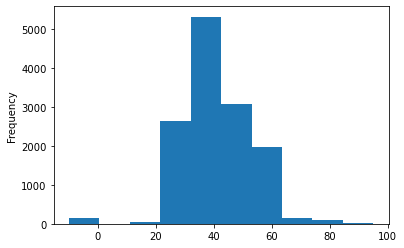

In [8]:
df['customer_age'].plot.hist()
plt.show()

#### Visualization Conclusion:  
##### We observe that the customer_age is not normally distributed, making it ineffective for identifying outliers using the z-score method.

### Exploring job_type column

In [9]:
df["job_type"].unique()
df['job_type'].fillna('unknown', inplace=True)


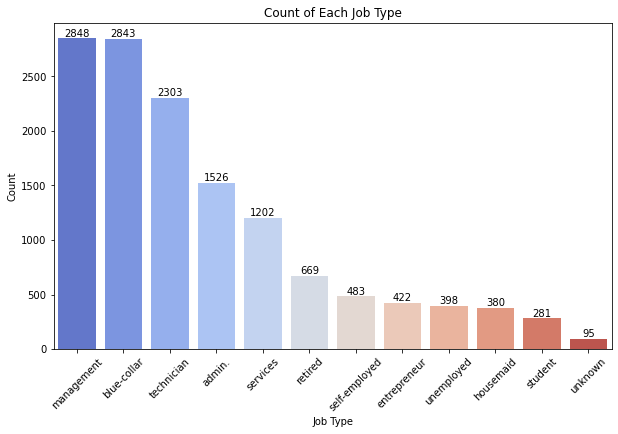

In [10]:
job_type_counts = df['job_type'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=job_type_counts.index, y=job_type_counts.values, palette='coolwarm')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.title('Count of Each Job Type')
plt.xticks(rotation=45)
for index, value in enumerate(job_type_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

#### Job Type Graph Conclusion:  
##### We observe that the most common job types are "management" and "blue-collar" and the least common types are "student" and "housemaid".
##### In the graph, we included the null values - we changed them to "unknown" and we can see that overall we have 95 null values.

### Exploring marital_status column

In [11]:
df["marital_status"].unique()
df['marital_status'].fillna('unknown', inplace=True)

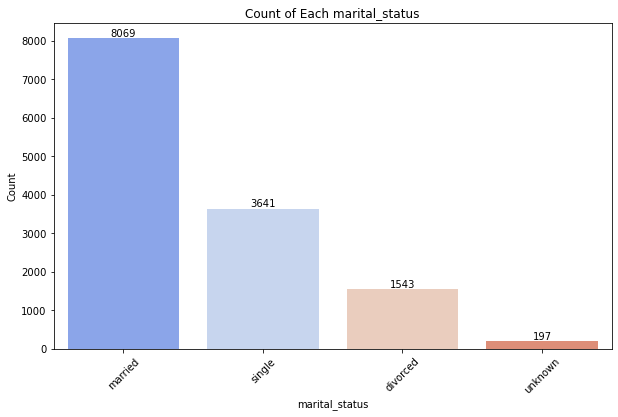

In [12]:
marital_status_counts = df['marital_status'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=marital_status_counts.index, y=marital_status_counts.values, palette='coolwarm')
plt.xlabel('marital_status')
plt.ylabel('Count')
plt.title('Count of Each marital_status')
plt.xticks(rotation=45)
for index, value in enumerate(marital_status_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

#### Marital Status Graph Conclusion:  
##### We observe that the most common marital status is "married" and the least common status is "divorced".
##### In the graph, we included the null values - we changed them to "unknown" and we can see that overall we have 197 null values.

### Exploring education_level column

In [13]:
df["education_level"].unique()
df['education_level'].fillna('unknown', inplace=True)

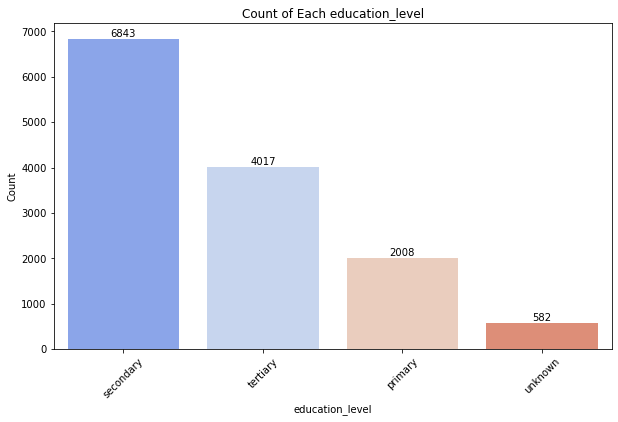

In [14]:
education_level_counts = df['education_level'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=education_level_counts.index, y=education_level_counts.values, palette='coolwarm')
plt.xlabel('education_level')
plt.ylabel('Count')
plt.title('Count of Each education_level')
plt.xticks(rotation=45)
for index, value in enumerate(education_level_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

#### Education level Graph Conclusion:  
##### We observe that the most common education level is "secondary" and the least common level is "primary".
##### It is possible that we have a corralation between education level and job type. we will check it once we will transfer the catagorial values to be numeric. Hence, we will do the corralation in the preprocessing stage.
##### In the graph, we included the null values - we changed them to "unknown" and we can see that overall we have 582 null values.

### Exploring has_internet_service column

In [15]:
df["has_internet_service"].unique()
df['has_internet_service'].fillna('unknown', inplace=True)

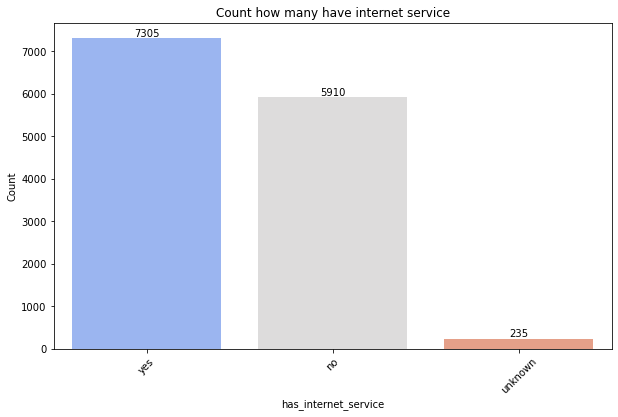

In [16]:
has_internet_service_counts = df['has_internet_service'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=has_internet_service_counts.index, y=has_internet_service_counts.values, palette='coolwarm')
plt.xlabel('has_internet_service')
plt.ylabel('Count')
plt.title('Count how many have internet service')
plt.xticks(rotation=45)
for index, value in enumerate(has_internet_service_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

#### Has Internet Graph Conclusion:  
##### We observe that most of the people in the train data has internet.
##### In the graph, we included the null values - we changed them to "unknown" and we can see that overall we have 235 null values.

### Exploring has_device_payment_plan column

In [17]:
df["has_device_payment_plan"].unique()
df['has_device_payment_plan'].fillna('unknown', inplace=True)

In [18]:
## we observed that we have "no" values and also "No" values so we aligned them all to be "no".
df['has_device_payment_plan'] = df['has_device_payment_plan'].replace('No', 'no')


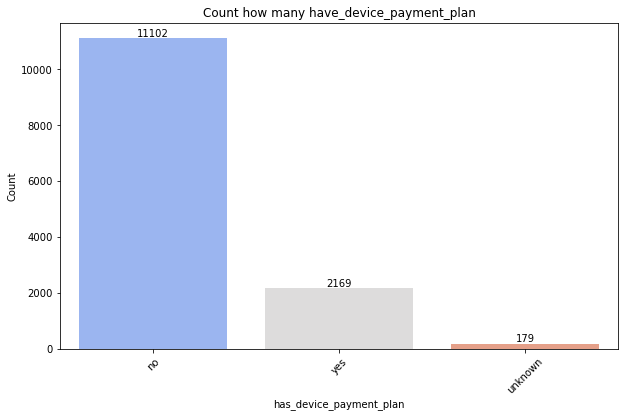

In [19]:
has_device_payment_plan_counts = df['has_device_payment_plan'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=has_device_payment_plan_counts.index, y=has_device_payment_plan_counts.values, palette='coolwarm')
plt.xlabel('has_device_payment_plan')
plt.ylabel('Count')
plt.title('Count how many have_device_payment_plan')
plt.xticks(rotation=45)
for index, value in enumerate(has_device_payment_plan_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

#### Have Device plan Graph Conclusion:  
##### We observe that most of the people in the train data do not have device plan. 
##### In the graph, we included the null values - we changed them to "unknown" and we can see that overall we have 179 null values.

### Exploring preferred_contact_method column

In [20]:
df["preferred_contact_method"].unique()
df['preferred_contact_method'].fillna('unknown', inplace=True)

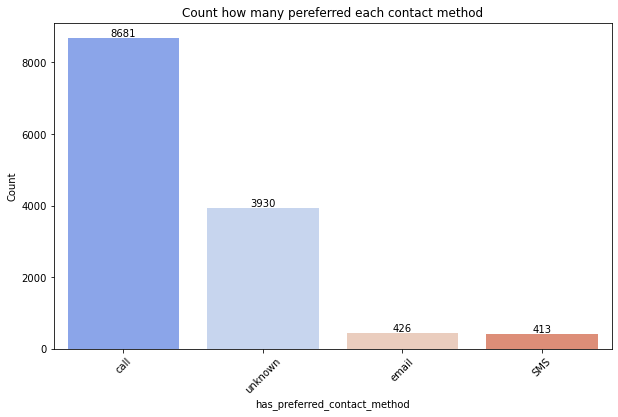

In [21]:
preferred_contact_method_counts = df['preferred_contact_method'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=preferred_contact_method_counts.index, y=preferred_contact_method_counts.values, palette='coolwarm')
plt.xlabel('has_preferred_contact_method')
plt.ylabel('Count')
plt.title('Count how many pereferred each contact method')
plt.xticks(rotation=45)
for index, value in enumerate(preferred_contact_method_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

#### Preferred Contact Method Graph Conclusion:  
##### We observe that the most preferred contact method is "call" and the least preferred is "SMS"
##### In the graph, we included the null values - we changed them to "unknown" and we can see that overall we have 3594 null values.

### Exploring day_of_week column

In [22]:
df["day_of_week"].unique()

array([15., 17., 28.,  2., nan, 31., 12., 30.,  8., 21., 29.,  4.,  7.,
       13.,  6., 18.,  9., 20., 14., 27., 23., 16., 24., 25., 19., 11.,
       26., 22.,  1.,  5.,  3., 10.])

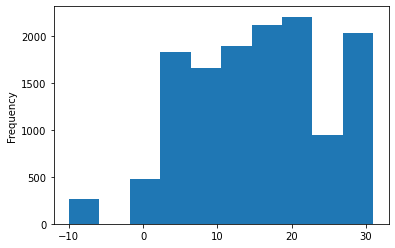

In [23]:
# we can observe that the name of the column is not correct - it is the day of the month values
df.rename(columns={'day_of_week': 'day_of_month'}, inplace=True)
# changed the null values to be a constant value "-10" - outlier number that represents the null values.
df['day_of_month'].fillna(-10, inplace=True)
# changed the no values to be a constant value "-10" - outlier number that represents irrelvant values too.
df['day_of_month'] = df['day_of_month'].replace('no', -10)
df['day_of_month'].plot.hist()
plt.show()

In [24]:
df['day_of_month'].describe()

count    13450.000000
mean        15.343346
std          8.984667
min        -10.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day_of_month, dtype: float64

#### Day Of Month Graph Conclusion:  
##### We observe that the day_of_month is not normally distributed, making it ineffective for identifying outliers using the z-score method.

### Exploring Month column

In [25]:
df["Month"].unique()
df['Month'].fillna('unknown', inplace=True)

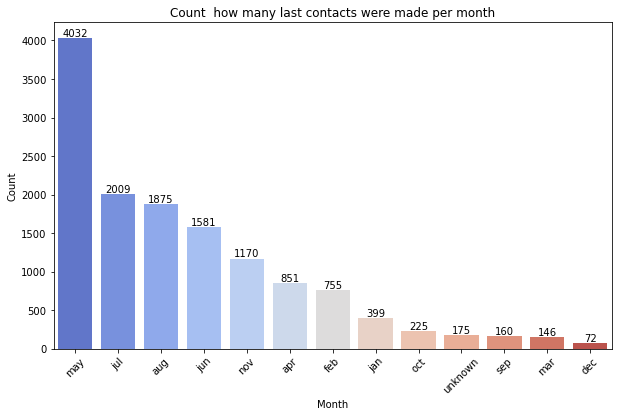

In [26]:
Month_counts = df['Month'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=Month_counts.index, y=Month_counts.values, palette='coolwarm')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count  how many last contacts were made per month')
plt.xticks(rotation=45)
for index, value in enumerate(Month_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

#### Month Graph Conclusion:  
##### We observe that most of the calls were made in "May" and the month with the least amount of last contact calls was "December"
##### In the graph, we included the null values - we changed them to "unknown" and we can see that overall we have 175 null values.

### Exploring preferred_call_time column

In [27]:
df["preferred_call_time"].unique()
## align all of the values names to match
df['preferred_call_time'] = df['preferred_call_time'].replace('eve', 'Evening')
df['preferred_call_time'] = df['preferred_call_time'].replace('morning', 'Morning')
df['preferred_call_time'] = df['preferred_call_time'].replace('Night ', 'Night')

df['preferred_call_time'].fillna('unknown', inplace=True)

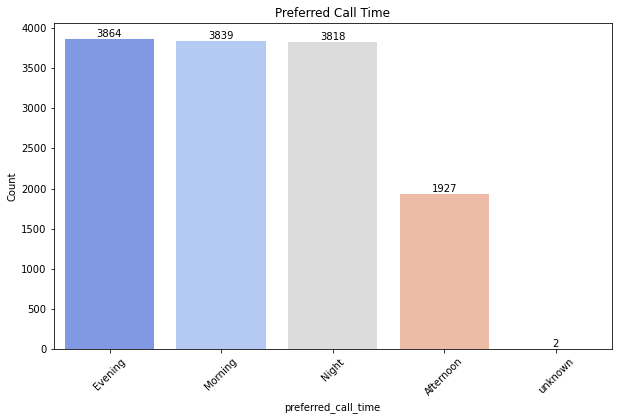

In [28]:
preferred_call_time_counts = df['preferred_call_time'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=preferred_call_time_counts.index, y=preferred_call_time_counts.values, palette='coolwarm')
plt.xlabel('preferred_call_time')
plt.ylabel('Count')
plt.title('Preferred Call Time')
plt.xticks(rotation=45)
for index, value in enumerate(preferred_call_time_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

#### Preferred Call Time Graph Conclusion:  
##### We observe that most people in the training data prefer to be called in the evening, morning, and night, while the afternoon is the least preferred time.
##### In the graph, we included the null values - we changed them to "unknown" and we can see that overall we have 2 null values.

### Exploring current_campaign_contacts column

[ 4.  3.  5.  1. 14.  2.  7. 11. 20. 13.  6. 12. 16.  9. 15.  8. 24. 26.
 21. 25. 31. 17. 10. 18. nan 29. 23. 22. 27. 19. 34. 39. 36. 32. 30. 46.
 63. 43. 28. 33.]


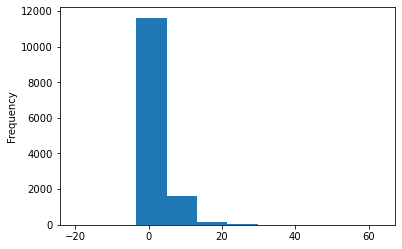

In [29]:
print(df["current_campaign_contacts"].unique())
# changed the null values to be a constant value "-20" - outlier number that represents the null values
df['current_campaign_contacts'].fillna(-20, inplace=True)
df['current_campaign_contacts'].plot.hist()
plt.show()

In [30]:
df['current_campaign_contacts'].describe()

count    13450.000000
mean         2.752714
std          3.059155
min        -20.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: current_campaign_contacts, dtype: float64

#### Current Campaign Contacts Graph Conclusion:  
##### We observe that the Current Campaign Contacts is not normally distributed, making it ineffective for identifying outliers using the z-score method.

### Exploring current_campaign_contacts.1 column

[ 4.  3.  5.  1. 14.  2.  7. 11. 20. 13.  6. 12. 16.  9. 15.  8. 24. 26.
 21. 25. 31. 17. 10. 18. 29. 23. 22. 27. 19. nan 34. 39. 36. 32. 30. 46.
 63. 43. 28. 33.]


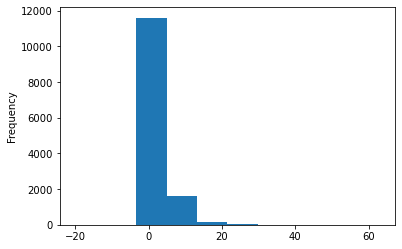

In [31]:
print(df["current_campaign_contacts.1"].unique())
# changed the null values to be a constant value "-20" - outlier number that represents the null values
df['current_campaign_contacts.1'].fillna(-20, inplace=True)
df['current_campaign_contacts.1'].plot.hist()
plt.show()

#### Current Campaign Contacts.1 Graph Conclusion:  
##### We observe that the 'Current Campaign Contacts.1' column appears similar to the 'Current Campaign' column. 

In [32]:
df['current_campaign_contacts.1'].describe()

count    13450.000000
mean         2.746022
std          3.083906
min        -20.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: current_campaign_contacts.1, dtype: float64

##### After using the describe method on both current_campaign_contacts columns, we get same values, so we will drop current_campaign_contacts.1 column

In [33]:
df = df.drop(columns=['current_campaign_contacts.1'])

### Exploring previous_campaign_contacts column

In [34]:
print(df["previous_campaign_contacts"].unique())



[  0.   1.  17.   2.   4.   7.   5.   3.  10.   6.  15.  24.  12.  30.
   9.   8.  11.  13.  23.  14.  16.  22.  nan  35.  21.  27.  19.  20.
  55. 275.  26.  25.]


##### From the uniqueness check, we can see that there are outliers and illogical values.


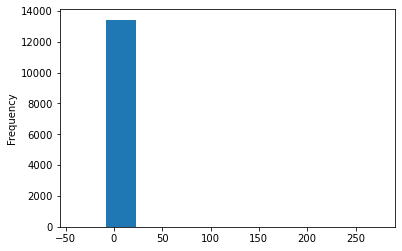

count    13450.000000
mean         0.586989
std          3.102276
min        -40.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous_campaign_contacts, dtype: float64

In [35]:
df['previous_campaign_contacts'].fillna(-40, inplace=True)
df['previous_campaign_contacts'].plot.hist()
plt.show()
df['previous_campaign_contacts'].describe()


####  previous_campaign_contacts Graph Conclusion:  
##### We observe that the Previous Campaign Contacts is not normally distributed, making it ineffective for identifying outliers using the z-score method.


### Exploring previous_campaign_outcome column

In [36]:
print(df["previous_campaign_outcome"].unique())

[nan 'success' 'other' 'failure']


In [37]:
df['previous_campaign_outcome'] = df['previous_campaign_outcome'].replace('other', 'nonexistent')
df['previous_campaign_outcome'].fillna('nonexistent', inplace=True)

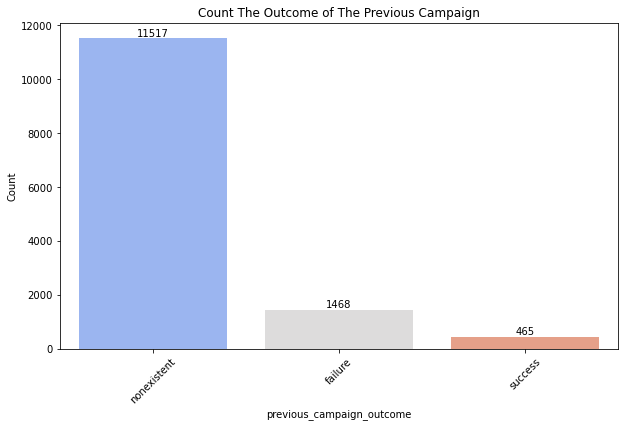

In [38]:
previous_campaign_outcome_counts = df['previous_campaign_outcome'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=previous_campaign_outcome_counts.index, y=previous_campaign_outcome_counts.values, palette='coolwarm')
plt.xlabel('previous_campaign_outcome')
plt.ylabel('Count')
plt.title('Count The Outcome of The Previous Campaign')
plt.xticks(rotation=45)
for index, value in enumerate(previous_campaign_outcome_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

#### previous_campaign_outcome Graph Conclusion:  
##### In the graph, we included the null values by changing them to 'nonexistent'. We observed a total of 11,517 null values. 
##### Since the majority of values in this column are null, we will likely remove this column during the preprocessing stage.

### Exploring A column

In [39]:
print(df["A"].unique())

['no' nan 'yes']


In [40]:
# We assume that none values as the same meaning - unkonwn information 
df['A'].fillna('unknown', inplace=True)

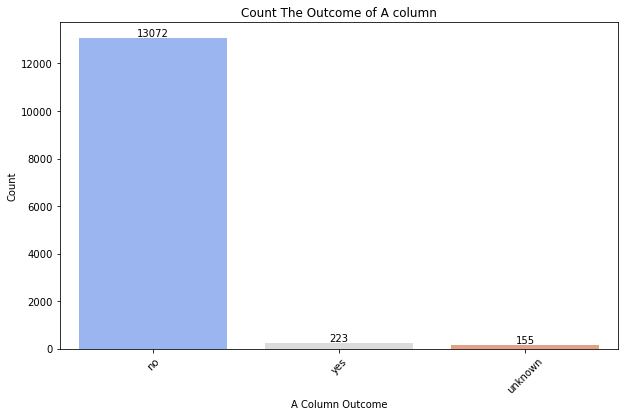

In [41]:
A_counts = df['A'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=A_counts.index, y=A_counts.values, palette='coolwarm')
plt.xlabel('A Column Outcome')
plt.ylabel('Count')
plt.title('Count The Outcome of A column')
plt.xticks(rotation=45)
for index, value in enumerate(A_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

#### Preferred A Graph Conclusion:  
##### We observe that most people in the training data has the answer no to this column.
##### In the graph, we included the null values\unknown - we changed them to "unknown" and we can see that overall we have 1272 null values.

### Exploring B column


In [42]:
print(df["B"].unique())

[2519.  923.  306. ... 1816. 5210. -137.]


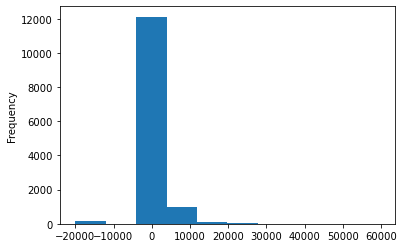

count    13450.000000
mean      1048.238364
std       3653.134563
min     -20000.000000
25%         62.000000
50%        428.000000
75%       1388.000000
max      59649.000000
Name: B, dtype: float64

In [43]:
df['B'].fillna(-20000, inplace=True)
df['B'].plot.hist()
plt.show()
df['B'].describe()


#### Current B column Graph Conclusion:  
##### We observe that the B column is not normally distributed, making it ineffective for identifying outliers using the z-score method.

In [44]:
ks_test = stats.kstest(df['B'], 'norm', args=(np.mean(df['B']), np.std(df['B'])))
print(f"Kolmogorov-Smirnov Test: D={ks_test.statistic}, p-value={ks_test.pvalue}")

Kolmogorov-Smirnov Test: D=0.3113915519662388, p-value=0.0


##### To double check, We did Kolmogorov-Smirnov test to check if the column is normally distrbuted.
##### We got p-value < 0.05 , so the column is not normally distrubted.

### Exploring C column


[ 82.213907    87.68560501  90.64004784 ... 102.65259015  89.26335243
 102.67581909]


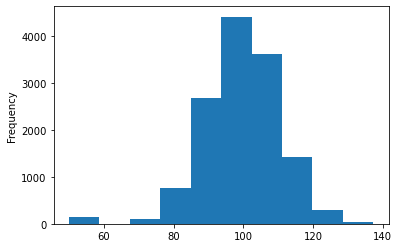

count    13450.000000
mean        99.375498
std         11.241869
min         50.000000
25%         92.893819
50%         99.643964
75%        106.626136
max        137.279368
Name: C, dtype: float64

In [45]:
print(df["C"].unique())
df['C'].fillna(50, inplace=True)
df['C'].plot.hist()
plt.show()
df['C'].describe()

#### Current C column Graph Conclusion:  
##### We observe that the C column is normally distributed, making it effective for identifying outliers using the z-score method.

### Exploring D column


[2.66957815 5.62449148 1.26490591 ... 4.33658526 5.6773708  5.69425217]


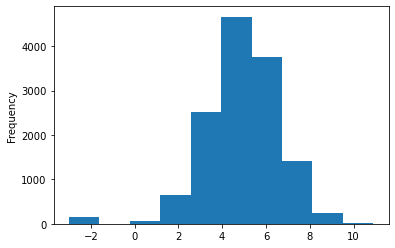

count    13450.000000
mean         4.904836
std          1.717181
min         -3.000000
25%          3.948800
50%          4.963736
75%          5.994690
max         10.899899
Name: D, dtype: float64

In [46]:
print(df["D"].unique())
df['D'].fillna(-3, inplace=True)
df['D'].plot.hist()
plt.show()
df['D'].describe()

#### Current D column Graph Conclusion:  
##### We observe that the D column is normally distributed, making it effective for identifying outliers using the z-score method.

# 2. Data Preprocessing - Train Set

### The preprocessing steps will be in the follwing order to ensure the quality and effectiveness of a machine learning model: 
#### 1.Handling missing values: must be addressed first to ensure the dataset is complete and to avoid errors in subsequent processing steps. Missing values can affect the results of type conversion, categorical encoding, outlier detection, and scaling.
#### 2. Handling types values: After missing values are handled, ensuring correct data types for each feature is crucial. Proper data types are required for accurate encoding of categorical variables and for performing statistical analyses. Incorrect data types can lead to errors and incorrect preprocessing.
#### 3.Handling categorical columns: With correct data types established, categorical variables must be encoded into numerical formats suitable for machine learning algorithms. This step is performed before scaling and outlier detection to ensure all features are in a consistent numerical format.
#### 4.Handling outliers: Outliers should be addressed after categorical values are encoded to avoid distorting the scaling process. Outlier treatment ensures that extreme values do not disproportionately influence statistical measures and model performance.
#### 5.Scaling: Scaling is performed after handling outliers to normalize features to a comparable scale. Proper scaling ensures that all features contribute equally to the model and improves the performance of algorithms that are sensitive to feature magnitudes.
#### 6.Correlation tests and dimensionality reduction  are used to remove redundant features and reduce the complexity of the model, improving performance while minimizing overfitting. Each step builds on the previous ones to prepare the data for effective model training and evaluation.

In [47]:
# We check if there are a duplicated rows.
# Count duplicate rows
duplicate_rows = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_rows}')


Number of duplicate rows: 0


## 2.1 Handling Missing Values

#### Customer ID Column

In [48]:
df["customer_id"].isnull().sum()

8

#### We fill the null values with unique customer id numbers 

In [49]:
max_order_number = df["customer_id"].max()
nan_count = df["customer_id"].isnull().sum()
new_order_numbers = range(int(max_order_number) + 1, int(max_order_number) + 1 + nan_count)
df.loc[df["customer_id"].isna(), "customer_id"] = new_order_numbers

#### Customer Age Column

In [50]:
null_customer_age = (df["customer_age"] == -10).sum()
# Print the result
print(f"Number of rows with the value null in 'customer_age': {null_customer_age}")

Number of rows with the value null in 'customer_age': 150


#### We fill the null values with the avarage customer age value

In [51]:
average_age = round(df['customer_age'].mean(),0)
# Replacing all the null values to the average value
df['customer_age'] = df['customer_age'].replace(-10, average_age )

#### We fill the null values with one of the top three job types randomly

#### Job Type Column

In [52]:
unknown_jt = (df["job_type"] == 'unknown').sum()
# Print the result
print(f"Number of rows with the value unknown in 'job_type': {unknown_jt}")

"""We scattered the unknown values on the three most frequent categories 
   because they have smilliar number of people in these categories"""
top_three_job_types = df['job_type'].value_counts().head(3).index.tolist()
# Function to randomly replace 'unknown' with one of the top three job types
def replace_unknown(value):
    if value == 'unknown':
        return np.random.choice(top_three_job_types)
    return value

# Apply the function to replace 'unknown' values
df['job_type'] = df['job_type'].apply(replace_unknown)

Number of rows with the value unknown in 'job_type': 95


#### We fill the null values with the most frequent value

#### Marital Status Column

In [53]:
null_marital_status = (df["marital_status"] == 'unknown').sum()
# Print the result
print(f"Number of rows with the unknown value in 'marital_status': {null_marital_status}")
# Replacing the unknown values to the most frequent value
df['marital_status'] = df['marital_status'].replace('unknown', 'married' )

Number of rows with the unknown value in 'marital_status': 197


#### Education Level Column

In [54]:
unknown_education_level = (df["education_level"] == 'unknown').sum()
# Print the result
print(f"Number of rows with the unknown value in 'education_level': {unknown_education_level}")

Number of rows with the unknown value in 'education_level': 582


#### We fill the null values with one of the top three education_level based on their weights randomly

In [55]:
#We distribute the unknown values across all other categories based on their frequencies.
education_level_counts = df['education_level'].value_counts().head(3)
education_level = education_level_counts.index.tolist()
education_level_weights = education_level_counts / education_level_counts.sum()

# Function to randomly replace 'unknown' with a education_level based on their weights
def replace_unknown_education_level(value):
    if value == 'unknown':
        return np.random.choice(education_level, p=education_level_weights)
    return value

# Apply the function to replace 'unknown' values
df['education_level'] = df['education_level'].apply(replace_unknown_education_level)

#### Has Internet Service Column

In [56]:
unknown_has_internet_service = (df["has_internet_service"] == 'unknown').sum()
# Print the result
print(f"Number of rows with the unknown value in 'has_internet_service': {unknown_has_internet_service}")

Number of rows with the unknown value in 'has_internet_service': 235


#### We fill the null values with one of the has_internet_service binary value based on their weights randomly

In [57]:
#We distribute the unknown values across all other categories based on their frequencies.
has_internet_service_counts = df['has_internet_service'].value_counts().head(2)
has_internet_service = has_internet_service_counts.index.tolist()
has_internet_service_weights = has_internet_service_counts / has_internet_service_counts.sum()

# Function to randomly replace 'unknown' with a education_level based on their weights
def replace_unknown_has_internet_service(value):
    if value == 'unknown':
        return np.random.choice(has_internet_service, p=has_internet_service_weights)
    return value

# Apply the function to replace 'unknown' values
df['has_internet_service'] = df['has_internet_service'].apply(replace_unknown_has_internet_service)

#### has_device_payment_plan Column

In [58]:
unknown_has_device_payment_plan = (df["has_device_payment_plan"] == 'unknown').sum()
# Print the result
print(f"Number of rows with the unknown value in 'has_device_payment_plan': {unknown_has_device_payment_plan}")

Number of rows with the unknown value in 'has_device_payment_plan': 179


#### We fill the null values with the most frequent value

In [59]:
df['has_device_payment_plan'] = df['has_device_payment_plan'].replace('unknown', 'no' )

#### preferred_contact_method Column

In [60]:
unknown_preferred_contact_method = (df["preferred_contact_method"] == 'unknown').sum()
# Print the result
print(f"Number of rows with the unknown value in 'preferred_contact_method': {unknown_preferred_contact_method}")

total_count = df['preferred_contact_method'].notnull().sum()
# Compute the percentage of 'unknown' occurrences
unknown_percentage = unknown_preferred_contact_method / total_count * 100
print(f"Percentage of 'unknown' in 'preferred_contact_method': {unknown_percentage:.2f}%")
df = df.drop(columns=['preferred_contact_method'])

Number of rows with the unknown value in 'preferred_contact_method': 3930
Percentage of 'unknown' in 'preferred_contact_method': 29.22%


#### Given that 29.22% of the values are unknown, we initially decided not to impute them, as this percentage is below
#### our 40% threshold for missing values. However, we later observed that the test set contains more than 40% null values
#### in this column. To maintain consistency between the training and test sets, we have now decided to remove the column.

#### day_of_month Column

In [61]:
null_day_of_month = (df["day_of_month"] == -10).sum()
# Print the result
print(f"Number of rows with the unknown value in 'day_of_week': {null_day_of_month}")

Number of rows with the unknown value in 'day_of_week': 260


#### We fill the null values with one of the day_of_month values based on their weights randomly

In [62]:
# Get the counts of the 'day_of_month' column, excluding '-10'
day_of_month_counts = df['day_of_month'][df['day_of_month'] != -10].value_counts()
# Get the list of categories and their weights
day_of_month_categories = day_of_month_counts.index.tolist()
day_of_month_weights = day_of_month_counts / day_of_month_counts.sum()

# Function to randomly replace 'unknown' with a value based on their weights, excluding '-10'
def replace_unknown_day_of_month(value):
    if value == -10:
        return np.random.choice(day_of_month_categories, p=day_of_month_weights)
    return value

# Apply the function to replace 'unknown' values
df['day_of_month'] = df['day_of_month'].apply(replace_unknown_day_of_month)

#### Month Column

In [63]:
null_of_month = (df["Month"] == "unknown").sum()
# Print the result
print(f"Number of rows with the unknown value in 'Month': {null_of_month}")

Number of rows with the unknown value in 'Month': 175


#### We fill the null values with the most frequent value

In [64]:
df['Month'] = df['Month'].replace('unknown', 'may' )

#### preferred_call_time Column

In [65]:
unknown_preferred_call_time = (df["preferred_call_time"] == "unknown").sum()
# Print the result
print(f"Number of rows with the unknown value in 'Month': {unknown_preferred_call_time}")

Number of rows with the unknown value in 'Month': 2


#### We fill the null values with the most frequent value

In [66]:
df['preferred_call_time'] = df['preferred_call_time'].replace('unknown', 'Evening' )

#### current_campaign_contacts Column

In [67]:
null_current_campaign_contacts = (df["current_campaign_contacts"] == -20).sum()
# Print the result
print(f"Number of rows with the null value in 'current_campaign_contacts': {null_current_campaign_contacts}")

Number of rows with the null value in 'current_campaign_contacts': 1


#### We fill the null values with the most frequent value

In [68]:
# Get the most frequent value in the 'current_campaign_contacts' column
most_frequent_value_current_campaign_contacts = df['current_campaign_contacts'].value_counts().idxmax()
# Replace '-20' values with the most frequent value
df['current_campaign_contacts'] = df['current_campaign_contacts'].replace(-20, most_frequent_value_current_campaign_contacts)

#### previous_campaign_contacts Column

In [69]:
null_previous_campaign_contacts = (df["previous_campaign_contacts"] == -40).sum()
# Print the result
print(f"Number of rows with the null value in 'previous_campaign_contacts': {null_previous_campaign_contacts}")

Number of rows with the null value in 'previous_campaign_contacts': 4


#### We fill the null values with the most frequent value

In [70]:
# Get the most frequent value in the 'current_campaign_contacts' column
most_frequent_value_previous_campaign_contacts = df['previous_campaign_contacts'].value_counts().idxmax()
# Replace '-40' values with the most frequent value
df['previous_campaign_contacts'] = df['previous_campaign_contacts'].replace(-40, most_frequent_value_previous_campaign_contacts)

#### previous_campaign_outcome Column

In [71]:
nonexistent_previous_campaign_outcome = (df["previous_campaign_outcome"] == 'nonexistent').sum()
# Print the result
print(f"Number of rows with the nonexistent value in 'previous_campaign_outcome': {nonexistent_previous_campaign_outcome}")

total_count = df['previous_campaign_outcome'].notnull().sum()
# Compute the percentage of 'unknown' occurrences
unknown_percentage = nonexistent_previous_campaign_outcome / total_count * 100
print(f"Percentage of 'nonexistent' in 'previous_campaign_outcome': {unknown_percentage:.2f}%")


Number of rows with the nonexistent value in 'previous_campaign_outcome': 11517
Percentage of 'nonexistent' in 'previous_campaign_outcome': 85.63%


#### Given that 85.63% of the values are missing, this column has a significant amount of missing data. Therefore, we will remove this column.

In [72]:
df = df.drop(columns=['previous_campaign_outcome'])

#### A Column

In [73]:
unknown_A = (df["A"] == 'unknown').sum()
# Print the result
print(f"Number of rows with the unknown value in 'A': {unknown_A}")

Number of rows with the unknown value in 'A': 155


#### We fill the null values with the most frequent value

In [74]:
df['A'] = df['A'].replace('unknown', 'no' )

#### B Column

In [75]:
null_B = (df["B"] == -20000).sum()
# Print the result
print(f"Number of rows with the unknown value in 'B': {null_B}")

Number of rows with the unknown value in 'B': 170


#### We fill the null values with the mean value

In [76]:
B_mean_val = df['B'][df['B'] != -20000].mean()
df['B'] = df['B'].replace(-20000, round(B_mean_val))

#### C column

In [77]:
null_C = (df["C"] == 50).sum()
# Print the result
print(f"Number of rows with the null value in 'C': {null_C}")

Number of rows with the null value in 'C': 151


#### We fill the null values with the mean value

In [78]:
C_mean_val = df['C'][df['C'] != 50].mean()
df['C'] = df['C'].replace(50, round(C_mean_val))

#### D column

In [79]:
null_D = (df["D"] == -3).sum()
# Print the result
print(f"Number of rows with the null value in 'D': {null_D}")

Number of rows with the null value in 'D': 159


#### We fill the null values with the mean value

In [80]:
D_mean_val = df['D'][df['D'] != -3].mean()
df['D'] = df['D'].replace(-3, round(D_mean_val))

## 2.2 Handling Types Values

In [81]:
def get_column_types(df):
    column_types = {} 
    for column in df.columns: 
        unique_types = set(df[column].map(type)) 
        column_types[column] = unique_types 
    return column_types

# Get the column types
column_types = get_column_types(df)

# Print column types in an organized way
for column, types in column_types.items():
    types_str = ', '.join([t.__name__ for t in types])
    print(f"Column '{column}' has types: {types_str}")

Column 'customer_id' has types: float
Column 'customer_age' has types: float
Column 'job_type' has types: str, str_
Column 'marital_status' has types: str
Column 'education_level' has types: str, str_
Column 'has_internet_service' has types: str, str_
Column 'has_device_payment_plan' has types: str
Column 'day_of_month' has types: float
Column 'Month' has types: str
Column 'preferred_call_time' has types: str
Column 'current_campaign_contacts' has types: float
Column 'previous_campaign_contacts' has types: float
Column 'A' has types: str
Column 'B' has types: float
Column 'C' has types: float
Column 'D' has types: float
Column 'subscribed_to_new_plan' has types: str


#### For columns containing both "str" and "str_" types, we will convert all values to the standard "str" type for consistency.
#### For columns with float values that represent integer data, we will convert them to int type for efficiency.

In [82]:
# Convert 3 columns to str using applymap
str_columns_to_convert = ['job_type', 'education_level', 'has_internet_service']
float_columns_to_convert = ['customer_id', 'customer_age', 'day_of_month', 'current_campaign_contacts','previous_campaign_contacts'  ]
df[str_columns_to_convert] = df[str_columns_to_convert].applymap(str)
df[float_columns_to_convert] = df[float_columns_to_convert].applymap(int)

In [83]:
def get_column_types(df):
    column_types = {} 
    for column in df.columns: 
        unique_types = set(df[column].map(type)) 
        column_types[column] = unique_types 
    return column_types

# Get the column types
column_types = get_column_types(df)

# Print column types in an organized way
for column, types in column_types.items():
    types_str = ', '.join([t.__name__ for t in types])
    print(f"Column '{column}' has types: {types_str}")

Column 'customer_id' has types: int
Column 'customer_age' has types: int
Column 'job_type' has types: str
Column 'marital_status' has types: str
Column 'education_level' has types: str
Column 'has_internet_service' has types: str
Column 'has_device_payment_plan' has types: str
Column 'day_of_month' has types: int
Column 'Month' has types: str
Column 'preferred_call_time' has types: str
Column 'current_campaign_contacts' has types: int
Column 'previous_campaign_contacts' has types: int
Column 'A' has types: str
Column 'B' has types: float
Column 'C' has types: float
Column 'D' has types: float
Column 'subscribed_to_new_plan' has types: str


## 2.3 Handling Categorical Columns

#### For categorical features with a limited number of categories, we will use the pandas.get_dummies() method, also known as one-hot encoding.
#### This method is not suitable for features with many unique categories, as it can significantly increase the number of features, leading to added complexity.
#### Additionally, it results in sparse matrices where most values are zeros.

In [84]:
get_dummies_columns = ['marital_status', 'education_level','preferred_call_time']
df= pd.get_dummies(df, columns= get_dummies_columns)



#### We use label encoding for categorical features with a high number of categories because of its simplicity and compact representation (feature space efficiency).

In [85]:
le = LabelEncoder()
label_encoding_columns = ['job_type', 'Month']
mappings = {}

# Initialize and fit a separate encoder for each column
for column in label_encoding_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column]) + 1  # Encode and shift labels by 1

    # Get the categories and create a mapping
    categories = le.classes_
    category_mapping = {i + 1: category for i, category in enumerate(categories)}
    mappings[column] = category_mapping

# Print mappings for each column
for column, mapping in mappings.items():
    print(f"Mapping for column '{column}': {mapping}")
    print()


Mapping for column 'job_type': {1: 'admin.', 2: 'blue-collar', 3: 'entrepreneur', 4: 'housemaid', 5: 'management', 6: 'retired', 7: 'self-employed', 8: 'services', 9: 'student', 10: 'technician', 11: 'unemployed'}

Mapping for column 'Month': {1: 'apr', 2: 'aug', 3: 'dec', 4: 'feb', 5: 'jan', 6: 'jul', 7: 'jun', 8: 'mar', 9: 'may', 10: 'nov', 11: 'oct', 12: 'sep'}



#### We use a mapping dictionary to convert "no" and "yes" values to integers as an better alternative to using get_dummies. (not adding more features)

In [86]:
mapping = {'no': 0, 'yes': 1}
yes_no_columns = ['has_internet_service', 'has_device_payment_plan','A', 'subscribed_to_new_plan']
df[yes_no_columns] = df[yes_no_columns].applymap(mapping.get)

## 2.4 Handling outliers values

### Customer Age Column
###### We saw in the exploration stage that the age range is logical. (min_age = 18, max_age = 95).
###### So no need to check for outliers.

### Day of Month Column
###### We saw in the exploration stage that the days range is logical. (min = 1, max = 31).
###### So no need to check for outliers.

### Current Campaign Contact
##### We will use interquartile range method

In [87]:

q1_quantity = df["current_campaign_contacts"].quantile(0.25)
q3_quantity = df["current_campaign_contacts"].quantile(0.75)
iqr_quantity = q3_quantity - q1_quantity
print(df["current_campaign_contacts"].mean())
campaign_outliers = df[(df["current_campaign_contacts"] < (q1_quantity - 1.5 * iqr_quantity)) | (df["current_campaign_contacts"] > (q3_quantity + 1.5 * iqr_quantity))]
print(campaign_outliers["current_campaign_contacts"].count())


2.754275092936803
913


#### Given the high number of outliers, removing these rows would lead to significant data loss.
#### Therefore, we will replace the outliers with threshold values.

In [88]:
# Replace outliers with threshold values
df.loc[df["current_campaign_contacts"] < (q1_quantity - 1.5 * iqr_quantity), "current_campaign_contacts"] = q1_quantity - 1.5 * iqr_quantity
df.loc[df["current_campaign_contacts"] > (q3_quantity + 1.5 * iqr_quantity), "current_campaign_contacts"] = q3_quantity + 1.5 * iqr_quantity

### Previous Campaign Contacts Column

In [89]:

q1_quantity = df["previous_campaign_contacts"].quantile(0.25)
q3_quantity = df["previous_campaign_contacts"].quantile(0.75)
iqr_quantity = q3_quantity - q1_quantity
campaign_outliers = df[(df["previous_campaign_contacts"] < (q1_quantity - 1.5 * iqr_quantity)) | (df["previous_campaign_contacts"] > (q3_quantity + 1.5 * iqr_quantity))]
num_campaign_outliers = campaign_outliers["previous_campaign_contacts"].count()
print(f"Number of rows with outlier value in 'previous_campaign_contacts': {num_campaign_outliers}")

Number of rows with outlier value in 'previous_campaign_contacts': 2497


In [90]:
df = df.drop(columns=['previous_campaign_contacts'])

#### Due to the significant number of outliers, 
#### removing these rows would result in substantial data loss. Since the bound value is 0,
#### all values will be essentially 0, making the column meaningless. Therefore, we have decided to remove this column.

### B Column

In [91]:

q1_quantity = df["B"].quantile(0.25)
q3_quantity = df["B"].quantile(0.75)
iqr_quantity = q3_quantity - q1_quantity
b_outliers = df[(df["B"] < (q1_quantity - 1.5 * iqr_quantity)) | (df["B"] > (q3_quantity + 1.5 * iqr_quantity))]
num_b_outliers = campaign_outliers["B"].count()
print(f"Number of rows with outlier value in 'B': {num_b_outliers}")


Number of rows with outlier value in 'B': 2497


#### Given the high number of outliers, removing these rows would lead to significant data loss.
#### Therefore, we will replace the outliers with threshold values.

In [92]:
# Replace outliers with threshold values
df.loc[df["B"] < (q1_quantity - 1.5 * iqr_quantity), "B"] = q1_quantity - 1.5 * iqr_quantity
df.loc[df["B"] > (q3_quantity + 1.5 * iqr_quantity), "B"] = q3_quantity + 1.5 * iqr_quantity

### C Column

In [93]:
# Checking outliers using the Z-score method
c_outliers = df['C'][np.abs(stats.zscore(df['C'])) > 3]
num_c_outliers = c_outliers.count()
print(f"Number of rows with outlier value in 'C': {num_c_outliers}")

Number of rows with outlier value in 'C': 41


#### Given the low number of outliers, we will remove these rows to avoid distorting the training process of our machine learning models.

In [94]:
# Filter the DataFrame to exclude the outliers
df = df[~df['C'].isin(c_outliers)]

## D Column

In [95]:
# Checking outliers using the Z-score method
d_outliers = df['D'][np.abs(stats.zscore(df['D'])) > 3]
num_d_outliers = d_outliers.count()
print(f"Number of rows with outlier value in 'D': {num_d_outliers}")

Number of rows with outlier value in 'D': 32


#### Given the low number of outliers, we will remove these rows to avoid distorting the 
#### training process of our machine learning models.

In [96]:
# Filter the DataFrame to exclude the outliers
df = df[~df['D'].isin(d_outliers)]

#### We handle only the columns that have the potential to contain outliers.
#### We do not handle categorical columns because they do not have outliers.

## 2.5 Scaling

#### Before scaling, we will remove the customer_id column, as it is merely a unique identifier and does not provide meaningful information for model training or prediction.

In [97]:
df = df.drop(columns=['customer_id'])

#### We will use Min-Max Scaling to normalize the data, transforming features to a common scale between 0 and 1. This technique helps manage features with different units, ensuring that all features contribute equally to the model. By standardizing the range, we improve the model's performance and convergence during training.

In [98]:
X = df.drop(columns=['subscribed_to_new_plan'])  # Features
y = df['subscribed_to_new_plan']  # Target variable

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Combine scaled features with the target variable
df = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)
df.columns = list(X.columns) + ['subscribed_to_new_plan']  # Rename columns to match original DataFrame



## 2.6  Correlation Test & Dimensionality Reduction

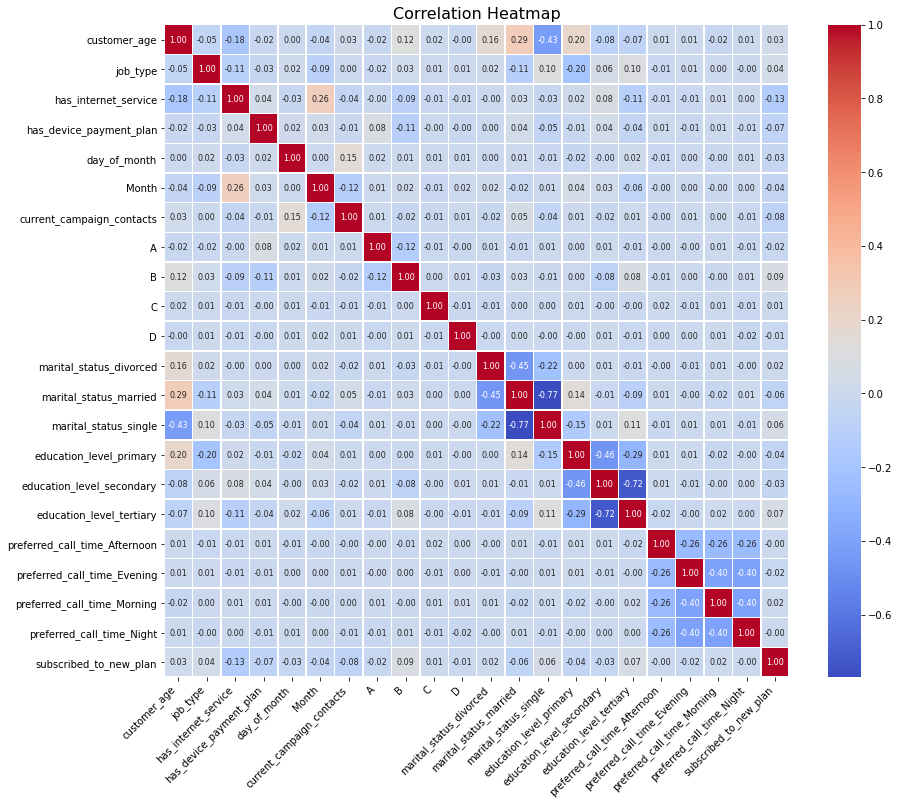

In [99]:
corr_matrix = df.corr()

# Increase figure size and adjust font size for better readability
plt.figure(figsize=(14, 12))  # Adjust size as needed

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', annot_kws={'size': 8})

# Rotate x and y axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.title('Correlation Heatmap', size=16)
plt.show()

#### We used correlation method in order to find high correlation (above 70%) between features and remove one of them
#### because this means they have similar trends and are likely to carry similar information.
#### We observe two pairs of columns with correlations exceeding 70%:
#### 1. marital_status_single and marital_status_married
#### 2. education_level_secondary and education_level_tertiary
#### We will remove the first column from each pair (marital_status_single and education_level_secondary) to reduce redundancy.


In [100]:
df = df.drop(columns=['marital_status_single','education_level_secondary'])

### Using  Random Forest feature_importances_ Method  

In [101]:
df.shape

(13377, 20)

#### To reduce the dimensionality of the data to 15 features,we will retain the most important ones based 
#### on feature importance scores from a Random Forest model, while discarding the less significant features.
#### Note: feature_importances_ provides the importance of each feature in the model. It is calculated based on how much each feature contributes to reducing the impurity of the splits in the trees of the random forest. The higher the importance, the more influence the feature has on the model's predictions.

In [102]:
X = df.drop(columns=['subscribed_to_new_plan'])  # Features
y = df['subscribed_to_new_plan']  # Target variable

# Train Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Extract feature importances
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]  # Indices of features sorted by importance

# Save original feature names
feature_names = X.columns

# Select top N features (e.g., top 10)
N = 15
top_n_indices = indices[:N]

# Reduce the dataset to selected features
X_reduced = X.iloc[:, top_n_indices]

# Print selected feature names
print("Selected feature indices:", top_n_indices)
print("Selected feature names:", feature_names[top_n_indices].tolist())

# Combine reduced features with the target variable
df = pd.concat([X_reduced.reset_index(drop=True), y.reset_index(drop=True)], axis=1)

# Rename columns of the reduced DataFrame
df.columns = list(feature_names[top_n_indices]) + ['subscribed_to_new_plan']


Selected feature indices: [10  9  0  8  4  5  1  6  2 17 18 14 16 12 15]
Selected feature names: ['D', 'C', 'customer_age', 'B', 'day_of_month', 'Month', 'job_type', 'current_campaign_contacts', 'has_internet_service', 'preferred_call_time_Morning', 'preferred_call_time_Night', 'education_level_tertiary', 'preferred_call_time_Evening', 'marital_status_married', 'preferred_call_time_Afternoon']


In [103]:
df.head()

,D,C,customer_age,B,day_of_month,Month,job_type,current_campaign_contacts,has_internet_service,preferred_call_time_Morning,preferred_call_time_Night,education_level_tertiary,preferred_call_time_Evening,marital_status_married,preferred_call_time_Afternoon,subscribed_to_new_plan
0,0.237386,0.199418,0.311688,0.840675,0.466667,0.727273,0.1,0.6,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0
1,0.570490,0.291607,0.181818,0.536327,0.533333,0.000000,0.0,0.6,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0
2,0.079038,0.341384,0.454545,0.418669,0.900000,0.454545,0.1,0.4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
3,0.318269,0.452965,0.181818,0.409325,0.033333,0.545455,0.9,0.8,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0
4,0.742955,0.504583,0.129870,0.353452,0.533333,0.727273,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0


In [104]:
df.shape

(13377, 16)

#### Even after reducing 7 features, the dataset still had a large number of features, resulting in high dimensionality. A high-dimensional dataset could lead to a complex model with an increased risk of overfitting. However, we had to be cautious not to reduce too many features, as doing so could have oversimplified the model and diminished its performance.

## Data Preprocessing - Test Set

In [105]:
df_test = pd.read_csv("test_telecom_marketing_data.csv")

In [106]:
df_test.head()

,customer_id,customer_age,job_type,marital_status,education_level,has_internet_service,has_device_payment_plan,preferred_contact_method,day_of_week,Month,preferred_call_time,current_campaign_contacts,current_campaign_contacts.1,previous_campaign_contacts,previous_campaign_outcome,A,B,C,D
0,127569,37.0,technician,married,secondary,no,no,NaN,20.0,jun,Evening,2,2.0,0,NaN,no,2209.0,111.889694,6.908892
1,120141,36.0,admin.,single,secondary,no,no,NaN,19.0,may,Afternoon,4,4.0,0,NaN,no,3457.0,79.895562,2.268559
2,127061,37.0,blue-collar,divorced,secondary,no,no,NaN,18.0,jun,eve,1,1.0,0,NaN,yes,-689.0,102.630868,7.769104
3,122873,30.0,services,married,secondary,yes,no,NaN,28.0,may,eve,1,1.0,0,NaN,no,179.0,108.446412,4.875030
4,157685,32.0,technician,married,tertiary,no,no,call,14.0,oct,Night,1,1.0,1,failure,no,2688.0,93.039465,3.780666


In [107]:
df_test.shape

(2374, 19)

In [108]:
# Check if there are rows with more than 10 null columns befroe we handle with the null values.
rows_with_many_nulls = df_test.isnull().sum(axis=1) > 10
num_rows_with_many_nulls = rows_with_many_nulls.sum()
print(f'Number of rows with more than 10 null columns: {num_rows_with_many_nulls}')

Number of rows with more than 10 null columns: 0


In [109]:
# We check if there are a duplicated rows.
# Count duplicate rows
duplicate_rows = df_test.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_rows}')


Number of duplicate rows: 0


## Handling Missing Values - Test Set

#### Customer ID Column

In [110]:
df_test["customer_id"].isnull().sum()

0

#### Customer Age Column

In [111]:
null_customer_age_test = df_test["customer_age"].isnull().sum()
# Print the result
print(f"Number of rows with the value null in 'customer_age': {null_customer_age_test}")

Number of rows with the value null in 'customer_age': 26


#### We fill the null values with the mean value

In [112]:
average_age_test = round(df_test['customer_age'].mean(),0)
# Replacing all the null values to the average value
df_test['customer_age'] = df_test['customer_age'].fillna(average_age_test)

#### Job Type Column

In [113]:
null_job_type_test = df_test["job_type"].isnull().sum()
print(df_test["job_type"].unique())
# Print the result
print(f"Number of rows with the value null in 'job_type': {null_job_type_test}")

"""We scattered the null values on the three most frequent categories 
   because they have smilliar number of people in these categories"""
top_three_job_types_test = df_test['job_type'].value_counts().head(3).index.tolist()
# Fill null values with one of the top three job types
df_test['job_type'] = df_test["job_type"].fillna(np.random.choice(top_three_job_types_test))

['technician' 'admin.' 'blue-collar' 'services' 'management'
 'entrepreneur' 'retired' 'self-employed' 'student' 'housemaid' nan
 'unemployed']
Number of rows with the value null in 'job_type': 17


#### We fill the null values with one of the top three job_type based on their weights randomly

#### Marital Status Column

In [114]:
null_marital_status_test = df_test["marital_status"].isnull().sum()
print(df_test["marital_status"].unique())
# Print the result
print(f"Number of rows with the null value in 'marital_status': {null_marital_status_test}")
#Replacing the null values to the most frequent value
most_frequent_value = df_test['marital_status'].mode()[0]
df_test['marital_status'] = df_test['marital_status'].fillna(most_frequent_value)

['married' 'single' 'divorced' nan]
Number of rows with the null value in 'marital_status': 36


#### We fill the null values with the most frequent value

In [115]:
print(df_test["marital_status"].unique())

['married' 'single' 'divorced']


#### Education Level Column

In [116]:
null_education_level_test = df_test["education_level"].isnull().sum()
print(df_test["education_level"].unique())
# Print the result
print(f"Number of rows with the null value in 'education_level': {null_education_level_test}")

['secondary' 'tertiary' 'primary' nan]
Number of rows with the null value in 'education_level': 87


#### We fill the null values with one of the top three education_level based on their weights randomly

In [117]:
#We distribute the null values across all other categories based on their frequencies.
education_level_counts_test = df_test['education_level'].value_counts().head(3)
education_level_test = education_level_counts_test.index.tolist()
education_level_weights_test = education_level_counts_test / education_level_counts_test.sum()

# Fill the 'null' values with education_level based on their weights
def replace_null_education_level(value):
    if pd.isnull(value):
        return np.random.choice(education_level_test, p=education_level_weights_test)
    return value
df_test['education_level'] = df_test['education_level'].apply(replace_null_education_level)

In [118]:
print(df_test["education_level"].unique())

['secondary' 'tertiary' 'primary']


#### Has Internet Service Column

In [119]:
null_has_internet_service = df_test["has_internet_service"].isnull().sum()
print(df_test["has_internet_service"].unique())
# Print the result
print(f"Number of rows with the null value in 'has_internet_service': {null_has_internet_service}")

['no' 'yes' nan]
Number of rows with the null value in 'has_internet_service': 49


#### We fill the null values with one of the has_internet_service binary values based on their weights randomly

In [120]:
#We distribute the null values across all other categories based on their frequencies.
has_internet_service_counts_test = df_test['has_internet_service'].value_counts().head(2)
has_internet_service_test = has_internet_service_counts_test.index.tolist()
has_internet_service_weights_test = has_internet_service_counts_test / has_internet_service_counts_test.sum()

# Function to randomly replace 'null' with a has_internet_service value based on their weights
def replace_null_has_internet_service(value):
    if pd.isnull(value):
        return np.random.choice(has_internet_service_test, p=has_internet_service_weights_test)
    return value

# Apply the function to replace 'unknown' values
df_test['has_internet_service'] = df_test['has_internet_service'].apply(replace_null_has_internet_service)

#### has_device_payment_plan Column

In [121]:
null_has_device_payment_plan = df_test["has_device_payment_plan"].isnull().sum()
print(df_test["has_device_payment_plan"].unique())
df_test["has_device_payment_plan"] = df_test["has_device_payment_plan"].replace('No','no')
# Print the result
print(f"Number of rows with the null value in 'has_device_payment_plan': {null_has_device_payment_plan}")

['no' 'yes' 'No' nan]
Number of rows with the null value in 'has_device_payment_plan': 33


#### We fill the null values with the most frequent value

In [122]:
df_test['has_device_payment_plan'] = df_test['has_device_payment_plan'].fillna('no')

#### preferred_contact_method Column

In [123]:

null_preferred_contact_method = df_test["preferred_contact_method"].isnull().sum()
# Print the result
print(f"Number of rows with the null value in 'preferred_contact_method': {null_preferred_contact_method}")

total_count_test = df_test['preferred_contact_method'].notnull().sum()
# Compute the percentage of 'unknown' occurrences
null_percentage = null_preferred_contact_method / total_count_test * 100
print(f"Percentage of 'null' in 'preferred_contact_method': {null_percentage:.2f}%")
df_test = df_test.drop(columns=['preferred_contact_method'])

Number of rows with the null value in 'preferred_contact_method': 700
Percentage of 'null' in 'preferred_contact_method': 41.82%


#### Because we have over 40% null values in this column we decided to remove it in the train and test sets


#### day_of_month Column

In [124]:
#Change the name of the column to day_of_month like we did in the train set
df_test.rename(columns={'day_of_week': 'day_of_month'}, inplace=True)
null_day_of_month = df_test["day_of_month"].isnull().sum()
# Print the result
print(f"Number of rows with the unknown value in 'day_of_month': {null_day_of_month}")

Number of rows with the unknown value in 'day_of_month': 55


#### We fill the null values with one of the day_of_month values based on their weights randomly

In [125]:
# Get the counts of the 'day_of_month' column
day_of_month_counts_test = df_test['day_of_month'].value_counts()
# Get the list of categories and their weights
day_of_month_categories_test = day_of_month_counts_test.index.tolist()
day_of_month_weights_test = day_of_month_counts_test / day_of_month_counts_test.sum()

# Function to randomly replace null with a value based on their weights
def replace_null_day_of_month(value):
    if pd.isnull(value):
        return np.random.choice(day_of_month_categories_test, p=day_of_month_weights_test)
    return value

# Apply the function to replace 'unknown' values
df_test['day_of_month'] = df_test['day_of_month'].apply(replace_null_day_of_month)

#### Month Column

In [126]:
null_of_month = df_test["Month"].isnull().sum()
print(df_test['Month'].unique())
# Print the result
print(f"Number of rows with the null value in 'Month': {null_of_month}")

['jun' 'may' 'oct' 'feb' 'jul' 'nov' 'sep' 'dec' 'jan' 'aug' 'apr' 'mar'
 nan]
Number of rows with the null value in 'Month': 37


#### We fill the null values with the most frequent value

In [127]:
df_test['Month'] = df_test['Month'].fillna('may')

#### preferred_call_time Column

In [128]:
null_preferred_call_time = df_test["preferred_call_time"].isnull().sum()
print(df_test["preferred_call_time"].unique())
# Print the result
print(f"Number of rows with the null value in 'preferred_call_time': {null_preferred_call_time}")

['Evening' 'Afternoon' 'eve' 'Night ' 'Morning' 'morning' 'Night' nan]
Number of rows with the null value in 'preferred_call_time': 1


#### We fill the null values with the mean value

In [129]:
df_test["preferred_call_time"] = df_test["preferred_call_time"].replace('eve','Evening')
df_test["preferred_call_time"] = df_test["preferred_call_time"].replace('Night ','Night')
df_test["preferred_call_time"] = df_test["preferred_call_time"].replace('morning','Morning')
df_test['preferred_call_time'] = df_test['preferred_call_time'].fillna('Evening')

#### current_campaign_contacts Column

In [130]:
null_current_campaign_contacts = df_test["current_campaign_contacts"].isnull().sum()
# Print the result
print(f"Number of rows with the null value in 'current_campaign_contacts': {null_current_campaign_contacts}")

Number of rows with the null value in 'current_campaign_contacts': 0


#### current_campaign_contacts.1

In [131]:
df_test = df_test.drop(columns=['current_campaign_contacts.1'])

#### We decided to remove this column in the train set so we will remove it from the test set as well


#### previous_campaign_contacts Column

In [132]:
null_previous_campaign_contacts = df_test["previous_campaign_contacts"].isnull().sum()
# Print the result
print(f"Number of rows with the null value in 'previous_campaign_contacts': {null_previous_campaign_contacts}")

Number of rows with the null value in 'previous_campaign_contacts': 0


#### previous_campaign_outcome Column

In [133]:
df_test = df_test.drop(columns=['previous_campaign_outcome'])

#### We decided to remove this column in the train set so we will remove it from the test set as well


#### A Column

In [134]:
null_A = df_test["A"].isnull().sum()
print(df_test['A'].unique())
# Print the result
print(f"Number of rows with the null value in 'A': {null_A}")

['no' 'yes' nan]
Number of rows with the null value in 'A': 31


#### We fill the null values with the most frequent value

In [135]:
df_test['A'] = df_test['A'].fillna('no')

#### B Column

In [136]:
null_B = df_test["B"].isnull().sum()
# Print the result
print(f"Number of rows with the null value in 'B': {null_B}")

Number of rows with the null value in 'B': 23


#### We fill the null values with the mean value

In [137]:
B_mean_val = df_test['B'].mean()
df_test['B'] = df_test['B'].fillna(B_mean_val)

#### C Column

In [138]:
null_C = df_test["C"].isnull().sum()
# Print the result
print(f"Number of rows with the null value in 'C': {null_C}")

Number of rows with the null value in 'C': 30


#### We fill the null values with the mean value

In [139]:
C_mean_val = df_test['C'].mean()
df_test['C'] = df_test['C'].fillna(C_mean_val)

#### D Column

In [140]:
null_D = df_test["D"].isnull().sum()
# Print the result
print(f"Number of rows with the null value in 'D': {null_D}")

Number of rows with the null value in 'D': 31


#### We fill the null values with the mean value

In [141]:
D_mean_val = df_test['D'].mean()
df_test['D'] = df_test['D'].fillna(D_mean_val)

## Handling Types Values - Test Set

In [142]:
# Get the column types
column_types_test = get_column_types(df_test)

# Print column types in an organized way
for column, types in column_types_test.items():
    types_str = ', '.join([t.__name__ for t in types])
    print(f"Column '{column}' has types: {types_str}")

Column 'customer_id' has types: int
Column 'customer_age' has types: float
Column 'job_type' has types: str, str_
Column 'marital_status' has types: str
Column 'education_level' has types: str, str_
Column 'has_internet_service' has types: str, str_
Column 'has_device_payment_plan' has types: str
Column 'day_of_month' has types: float
Column 'Month' has types: str
Column 'preferred_call_time' has types: str
Column 'current_campaign_contacts' has types: int
Column 'previous_campaign_contacts' has types: int
Column 'A' has types: str
Column 'B' has types: float
Column 'C' has types: float
Column 'D' has types: float


#### For columns containing both "str" and "str_" types, we will convert all values to the standard "str" type for consistency.
#### For columns with float values that represent integer data, we will convert them to int type for efficiency.

In [143]:
# Convert 3 columns to str using applymap
str_columns_to_convert = ['job_type', 'has_internet_service', 'education_level']
float_columns_to_convert = ['customer_age', 'day_of_month']
df_test[str_columns_to_convert] = df_test[str_columns_to_convert].applymap(str)
df_test[float_columns_to_convert] = df_test[float_columns_to_convert].applymap(int)

In [144]:
# Get the column types
column_types_test = get_column_types(df_test)

# Print column types in an organized way
for column, types in column_types_test.items():
    types_str = ', '.join([t.__name__ for t in types])
    print(f"Column '{column}' has types: {types_str}")

Column 'customer_id' has types: int
Column 'customer_age' has types: int
Column 'job_type' has types: str
Column 'marital_status' has types: str
Column 'education_level' has types: str
Column 'has_internet_service' has types: str
Column 'has_device_payment_plan' has types: str
Column 'day_of_month' has types: int
Column 'Month' has types: str
Column 'preferred_call_time' has types: str
Column 'current_campaign_contacts' has types: int
Column 'previous_campaign_contacts' has types: int
Column 'A' has types: str
Column 'B' has types: float
Column 'C' has types: float
Column 'D' has types: float


## Handling Categorical Columns - Test Set

#### Did the same process we did in the train set to stay consistent

In [145]:
get_dummies_columns = ['marital_status', 'education_level','preferred_call_time']
df_test = pd.get_dummies(df_test , columns= get_dummies_columns)

In [146]:
le = LabelEncoder()
label_encoding_columns = ['job_type', 'Month']
mappings = {}

# Initialize and fit a separate encoder for each column
for column in label_encoding_columns:
    le = LabelEncoder()
    df_test[column] = le.fit_transform(df_test[column]) + 1  # Encode and shift labels by 1

    # Get the categories and create a mapping
    categories = le.classes_
    category_mapping = {i + 1: category for i, category in enumerate(categories)}
    mappings[column] = category_mapping

# Print mappings for each column
for column, mapping in mappings.items():
    print(f"Mapping for column '{column}': {mapping}")
    print()


Mapping for column 'job_type': {1: 'admin.', 2: 'blue-collar', 3: 'entrepreneur', 4: 'housemaid', 5: 'management', 6: 'retired', 7: 'self-employed', 8: 'services', 9: 'student', 10: 'technician', 11: 'unemployed'}

Mapping for column 'Month': {1: 'apr', 2: 'aug', 3: 'dec', 4: 'feb', 5: 'jan', 6: 'jul', 7: 'jun', 8: 'mar', 9: 'may', 10: 'nov', 11: 'oct', 12: 'sep'}



In [147]:
mapping = {'no': 0, 'yes': 1}
yes_no_columns = ['has_internet_service', 'has_device_payment_plan','A']
df_test[yes_no_columns] = df_test[yes_no_columns].applymap(mapping.get)

## Handling outliers values - Test Set

### Customer Age Column

In [148]:
df_test['customer_age'].describe()
###### We see that the age range is logical. (min_age = 19, max_age = 85).
###### So no need to check for outliers.

count    2374.000000
mean       40.897220
std        10.417879
min        19.000000
25%        33.000000
50%        39.000000
75%        48.000000
max        85.000000
Name: customer_age, dtype: float64

### Day of Month Column

In [149]:
df_test['day_of_month'].describe()
###### We see that the days range is logical. (min_day = 1, max_day = 31).
###### So no need to check for outliers.

count    2374.000000
mean       15.747262
std         8.218476
min         1.000000
25%         8.000000
50%        16.000000
75%        21.000000
max        31.000000
Name: day_of_month, dtype: float64

### Current Campaign Contact
##### We will use interquartile range method

In [150]:
# Checking outliers and Normal distrbution
q1_quantity = df_test["current_campaign_contacts"].quantile(0.25)
q3_quantity = df_test["current_campaign_contacts"].quantile(0.75)
iqr_quantity = q3_quantity - q1_quantity
print(df_test["current_campaign_contacts"].mean())
campaign_outliers = df_test[(df_test["current_campaign_contacts"] < (q1_quantity - 1.5 * iqr_quantity)) | (df_test["current_campaign_contacts"] > (q3_quantity + 1.5 * iqr_quantity))]
print(campaign_outliers["current_campaign_contacts"].count())


2.7683235046335297
178


#### To remain consistent with the training data, we will do same process.

In [151]:
# Replace outliers with threshold values
df_test.loc[df_test["current_campaign_contacts"] < (q1_quantity - 1.5 * iqr_quantity), "current_campaign_contacts"] = q1_quantity - 1.5 * iqr_quantity
df_test.loc[df_test["current_campaign_contacts"] > (q3_quantity + 1.5 * iqr_quantity), "current_campaign_contacts"] = q3_quantity + 1.5 * iqr_quantity

### Previous Campaign Contacts Column

In [152]:
# Checking outliers and Normal distrbution
q1_quantity = df_test["previous_campaign_contacts"].quantile(0.25)
q3_quantity = df_test["previous_campaign_contacts"].quantile(0.75)
iqr_quantity = q3_quantity - q1_quantity
campaign_outliers = df_test[(df_test["previous_campaign_contacts"] < (q1_quantity - 1.5 * iqr_quantity)) | (df_test["previous_campaign_contacts"] > (q3_quantity + 1.5 * iqr_quantity))]
num_campaign_outliers = campaign_outliers["previous_campaign_contacts"].count()
print(f"Number of rows with outlier value in 'previous_campaign_contacts': {num_campaign_outliers}")

Number of rows with outlier value in 'previous_campaign_contacts': 421


In [153]:
# Beacuse we dropped this column in the train set we will also drop it in the test set
df_test = df_test.drop(columns=['previous_campaign_contacts'])

### B Column

In [154]:
# Checking outliers and Normal distrbution
q1_quantity = df_test["B"].quantile(0.25)
q3_quantity = df_test["B"].quantile(0.75)
iqr_quantity = q3_quantity - q1_quantity
b_outliers = df_test[(df_test["B"] < (q1_quantity - 1.5 * iqr_quantity)) | (df_test["B"] > (q3_quantity + 1.5 * iqr_quantity))]
num_b_outliers = campaign_outliers["B"].count()
print(f"Number of rows with outlier value in 'B': {num_b_outliers}")


Number of rows with outlier value in 'B': 421


In [155]:
# Replace outliers with threshold values
df_test.loc[df_test["B"] < (q1_quantity - 1.5 * iqr_quantity), "B"] = q1_quantity - 1.5 * iqr_quantity
df_test.loc[df_test["B"] > (q3_quantity + 1.5 * iqr_quantity), "B"] = q3_quantity + 1.5 * iqr_quantity

### C Column

In [156]:
# Checking outliers using the Z-score method
c_outliers = df_test['C'][np.abs(stats.zscore(df_test['C'])) > 3]
num_c_outliers = c_outliers.count()
print(f"Number of rows with outlier value in 'C': {num_c_outliers}")

Number of rows with outlier value in 'C': 3


#### Given the low number of outliers, we will remove these rows to avoid distorting the training process of our machine learning models.

In [157]:
# Filter the DataFrame to exclude the outliers
df_test = df_test[~df_test['C'].isin(c_outliers)]

### D Column

In [158]:
# Checking outliers using the Z-score method
d_outliers = df_test['D'][np.abs(stats.zscore(df_test['D'])) > 3]
num_d_outliers = d_outliers.count()
print(f"Number of rows with outlier value in 'D': {num_d_outliers}")

Number of rows with outlier value in 'D': 4


#### Given the low number of outliers, we will remove these rows to avoid distorting the training process of our machine learning models.

In [159]:
# Filter the DataFrame to exclude the outliers
df_test = df_test[~df_test['D'].isin(d_outliers)]

## Scaling - Test Set

#### Similar to the training set, we will remove the customer_id column but save it for the prediction stage.

In [160]:
X_test_customer_id = df_test['customer_id']
df_test = df_test.drop(columns=['customer_id'])

#### We fit the scaler on the training data only and tranform both the training and test sets based on the same scaler

In [161]:
# Transform the test data using the same scaler
df_test_scaled = scaler.transform(df_test)

# Create a new DataFrame with scaled features 
df_test = pd.DataFrame(df_test_scaled, columns=df_test.columns)


## Dimensionality Reduction - Test Set

#### To ensure consistent dimensionality reduction across both the training and test datasets, we also removed the two columns ('marital_status_single' and 'education_level_secondary') from the test set that were removed during the correlation test stage in the training set.

In [162]:
df_test = df_test.drop(columns=['marital_status_single','education_level_secondary'])

#### Dimensionality Reduction - Random Forest feature_importances_ - Test Set
#### We retain the same columns identified as most important by the Random Forest model trained on the training set. This approach ensures consistent dimensionality reduction across both the training and test datasets.


In [163]:
df_test.shape

(2367, 19)

In [164]:
df_test.columns

Index(['customer_age', 'job_type', 'has_internet_service',
       'has_device_payment_plan', 'day_of_month', 'Month',
       'current_campaign_contacts', 'A', 'B', 'C', 'D',
       'marital_status_divorced', 'marital_status_married',
       'education_level_primary', 'education_level_tertiary',
       'preferred_call_time_Afternoon', 'preferred_call_time_Evening',
       'preferred_call_time_Morning', 'preferred_call_time_Night'],
      dtype='object')

In [165]:
X_test = df_test

# Reduce the dataset to selected features
df_test = df_test.iloc[:, top_n_indices]

In [166]:
df_test.head()

,D,C,customer_age,B,day_of_month,Month,job_type,current_campaign_contacts,has_internet_service,preferred_call_time_Morning,preferred_call_time_Night,education_level_tertiary,preferred_call_time_Evening,marital_status_married,preferred_call_time_Afternoon
0,0.715279,0.699402,0.246753,0.781560,0.633333,0.545455,0.9,0.2,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.192179,0.160358,0.233766,1.011823,0.600000,0.727273,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.812250,0.543407,0.246753,0.228928,0.566667,0.545455,0.1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.486004,0.641389,0.155844,0.394451,0.900000,0.727273,0.7,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.362637,0.381809,0.181818,0.872902,0.433333,0.909091,0.9,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


# 3.Running Models

## Loigstic Regression

#### We chose to use logistic Regression because it can handle high-dimensional data (many features) better and it does not rely on distance calculations, which can become less meaningful in high dimensions (curse of dimensionality).

In [167]:
X = df.drop(columns=['subscribed_to_new_plan'])  # Features
y = df['subscribed_to_new_plan']  # Target variable

#### We trained the models on the training data and used the validation data to evaluate the models' performance.

In [168]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25,random_state =42, shuffle = True)

#### We use the Grid Search method to find the optimal hyperparameters.
#### GridSearchCV evaluates each combination to help determine the best penalty and solver for our specific dataset and target.

In [169]:
clf_logistic = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10], 'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],'tol': [0.0001],
    'max_iter': [1000],'warm_start':[False],'n_jobs':[None],'class_weight':[None],'multi_class':['auto'],'intercept_scaling':[1]}

GS = GridSearchCV(clf_logistic, param_grid=grid_values, cv=10, scoring='roc_auc')
GS.fit(X_train, y_train)



C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\model_selectio

C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\model_selectio

C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\model_selectio

C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\model_selectio

C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\model_selectio

C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.5               nan        nan        nan 0.5        0.60676539
 0.65035483 0.65035776 0.65035287 0.65035483 0.62233435        nan
        nan        nan 0.59916626 0.64583032 0.65802261 0.65801771
 0.65802359 0.65802261 0.65988896        nan        nan        nan
 0.66093514 0.66232363 0.66341271 0.66341761 0.66340977 0.66341368
 0.663318          nan        nan        nan 0.66340712 0.66354315
 0.66353249 0.66353641 0.66353641 0.66353249 0.66338956        nan
        nan        nan 0.66340817 0.66339248 0.66341012 0.66341698
 0.66340914 0.66340914]
  warnings.warn(


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'class_weight': [None],
                         'intercept_scaling': [1], 'max_iter': [1000],
                         'multi_class': ['auto'], 'n_jobs': [None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga'],
                         'tol': [0.0001], 'warm_start': [False]},
             scoring='roc_auc')

In [170]:
print('Chosen parameters (received best AUC): {}'.format(GS.best_params_))
print("AUC score with the chosen parameters: ", GS.best_score_)

clf_logistic = LogisticRegression(**GS.best_params_)

Chosen parameters (received best AUC): {'C': 1, 'class_weight': None, 'intercept_scaling': 1, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001, 'warm_start': False}
AUC score with the chosen parameters:  0.6635431451650213


## Support Vectors Machine (SVM)

In [171]:
#Grid Search
powers = range(-3,4)
Gs = [10**p for p in powers]
clf_svm = svm.SVC()
grid_values = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1], 'gamma': Gs, 'max_iter': [200],'coef0':[0.0],
                'tol':[0.001], 'shrinking':[True],'cache_size':[200],'class_weight':[None],'verbose':[False]}

GS = GridSearchCV(clf_svm, param_grid = grid_values, cv=10, scoring = 'roc_auc')
GS.fit(X_train, y_train)



C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver t

C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver t

C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver t

C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver t

C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver t

C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver t

C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver t

C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver t

C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver t

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1], 'cache_size': [200], 'class_weight': [None],
                         'coef0': [0.0],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': [200], 'shrinking': [True], 'tol': [0.001],
                         'verbose': [False]},
             scoring='roc_auc')

In [172]:
print ('chosen parameters (recieved best AUC): {}'.format(GS.best_params_))
print ("AUC score with the chosen parameters: ", GS.best_score_)
# For the use of K-Fold Cross Validation, we defined that the probability will be True.
GS.best_params_.update({'probability' : True})
clf_svm = svm.SVC(**GS.best_params_)

chosen parameters (recieved best AUC): {'C': 1, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 200, 'shrinking': True, 'tol': 0.001, 'verbose': False}
AUC score with the chosen parameters:  0.5719434060901023


## Artificial Neural Networks (ANN)

In [173]:
parametersOptions = {'activation' : ["logistic", "relu"], 'hidden_layer_sizes' : [(100,), (50, 50),
                (20, 20, 10, 10, 10)], 'batch_size' : [50], 'learning_rate_init' : [0.1, 0.01], 'max_iter' : [500]
                    ,'solver' : ["sgd"], 'learning_rate' : ["invscaling"], 'power_t'  : [0.5], "tol": [1e-4], 
                    'early_stopping' : [True], 'warm_start' : [False], 'alpha': [0.01,0.1,1],'alpha': [0.0001],'shuffle': [True],
                    'random_state': [42], 'momentum': [0.9], 'nesterovs_momentum': [True], 
                    'validation_fraction': [0.1] ,'beta_1': [0.9], 'beta_2': [0.999], 'epsilon': [1e-08]} 
clf_ann = MLPClassifier()
GS = GridSearchCV(clf_ann, parametersOptions, cv=3, scoring='roc_auc')
GS.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'], 'alpha': [0.0001],
                         'batch_size': [50], 'beta_1': [0.9], 'beta_2': [0.999],
                         'early_stopping': [True], 'epsilon': [1e-08],
                         'hidden_layer_sizes': [(100,), (50, 50),
                                                (20, 20, 10, 10, 10)],
                         'learning_rate': ['invscaling'],
                         'learning_rate_init': [0.1, 0.01], 'max_iter': [500],
                         'momentum': [0.9], 'nesterovs_momentum': [True],
                         'power_t': [0.5], 'random_state': [42],
                         'shuffle': [True], 'solver': ['sgd'], 'tol': [0.0001],
                         'validation_fraction': [0.1], 'warm_start': [False]},
             scoring='roc_auc')

In [174]:
print ('Neural Network chosen parameters (recieved best AUC): {}'.format(GS.best_params_))
print ("Neural Network AUC score with the chosen parameters: ", GS.best_score_)
clf_ann = MLPClassifier(**GS.best_params_)  # Using the best parameters

Neural Network chosen parameters (recieved best AUC): {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 50, 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'invscaling', 'learning_rate_init': 0.1, 'max_iter': 500, 'momentum': 0.9, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'warm_start': False}
Neural Network AUC score with the chosen parameters:  0.6556688798251061


## Random Forest

#### We prefer using Random Forest over a Decision Tree because Random Forest generally offers superior accuracy.
#### It achieves this by aggregating the predictions of multiple trees, which helps in reducing overfitting and variance.
#### Additionally, Random Forest demonstrates better generalization to unseen data due to its composite approach, 
#### which averages the predictions from various trees.

In [175]:
parametersOptions = {"criterion" : ["entropy","gini"], 'max_depth' : [15,18], 'max_features' : [6,9], "min_impurity_decrease": [0.0000001],
                    "random_state" : [0], "n_estimators" : [250,300], 'max_leaf_nodes': [160,180], 'min_samples_split' : [3],
                    'min_samples_leaf' : [3], 'class_weight': ['balanced'],'min_weight_fraction_leaf': [0.0],
                    'bootstrap': [True], 'oob_score': [False], 'n_jobs': [None], 'random_state': [42], 'verbose': [0], 'warm_start': [False]}
cls_forest = RandomForestClassifier()
GS = GridSearchCV(cls_forest, parametersOptions, cv=5, scoring='roc_auc')
GS.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'class_weight': ['balanced'],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [15, 18], 'max_features': [6, 9],
                         'max_leaf_nodes': [160, 180],
                         'min_impurity_decrease': [1e-07],
                         'min_samples_leaf': [3], 'min_samples_split': [3],
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [250, 300], 'n_jobs': [None],
                         'oob_score': [False], 'random_state': [42],
                         'verbose': [0], 'warm_start': [False]},
             scoring='roc_auc')

In [176]:
print ('Random Forest chosen parameters (recieved best AUC): {}'.format(GS.best_params_))
print ("Random Forest AUC score with the chosen parameters: ", GS.best_score_)

cls_forest = RandomForestClassifier(**GS.best_params_)


Random Forest chosen parameters (recieved best AUC): {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 18, 'max_features': 6, 'max_leaf_nodes': 160, 'min_impurity_decrease': 1e-07, 'min_samples_leaf': 3, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Random Forest AUC score with the chosen parameters:  0.709953925568053


## 4.model evaluation

### 4.1 Confusion Matrix

#### We chose the Random Forest model because it returned the highest AUC on the training set. After selecting the model and tuning the hyperparameters, we trained the model on the training data and validated it using the validation data.

In [177]:
cls_forest.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=18, max_features=6,
                       max_leaf_nodes=160, min_impurity_decrease=1e-07,
                       min_samples_leaf=3, min_samples_split=3,
                       n_estimators=300, random_state=42)

[[ 162  309]
 [ 221 2653]]


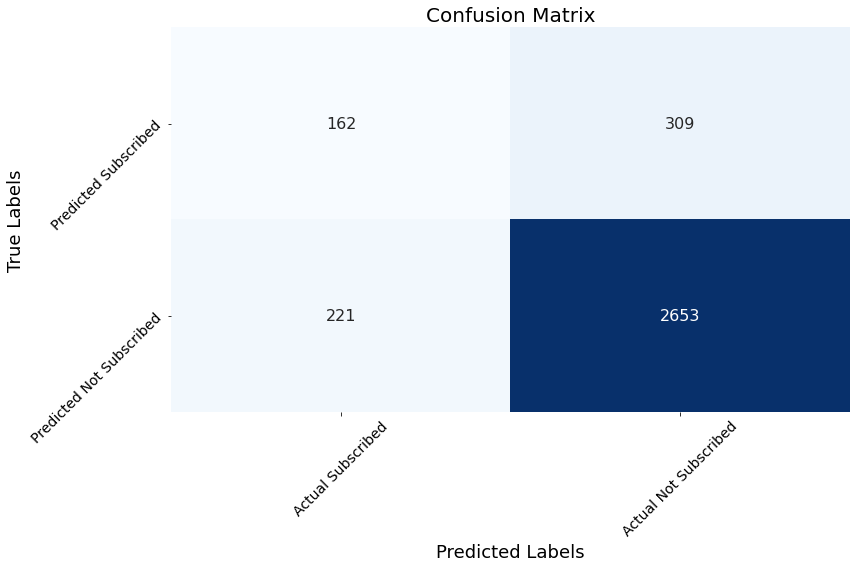

Accuracy: 0.84
Precision: 0.34
Sensitivity (Recall): 0.42
Specificity: 0.90
False Positive Rate (FPR): 0.10


In [178]:
y_pred = cls_forest.predict(X_val)
y_true = y_val
def conf_matrix(y_pred, y_true):
    cm = confusion_matrix(y_true,y_pred)
    tn,fp,fn,tp = cm.ravel()
    cm_matrix = np.array([[tp,fp],[fn,tn]])
    print(cm_matrix)

    # Plotting the confusion matrix
    plt.figure(figsize=(12, 8))  # Increase the figure size for better text fit
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Actual Subscribed', 'Actual Not Subscribed'],
                yticklabels=['Predicted Subscribed', 'Predicted Not Subscribed'],
                annot_kws={"size": 16})  # Increase the size of the annotations

    plt.xlabel('Predicted Labels', fontsize=18)  # Increase the size of x-axis label
    plt.ylabel('True Labels', fontsize=18)  # Increase the size of y-axis label
    plt.title('Confusion Matrix', fontsize=20)  # Increase the size of the title
    plt.xticks(rotation=45, fontsize=14)  # Rotate and increase size of x-axis labels
    plt.yticks(rotation=45, fontsize=14)  # Rotate and increase size of y-axis labels
    plt.tight_layout()  # Adjust layout to fit everything
    plt.show()
    
    # Calculate and print metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    sensitivity = recall_score(y_true, y_pred)  # Sensitivity is the same as recall
    specificity = tn / (tn + fp)
    fpr = fp / (fp + tn)

    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Sensitivity (Recall): {sensitivity:.2f}')
    print(f'Specificity: {specificity:.2f}')
    print(f'False Positive Rate (FPR): {fpr:.2f}')
    
conf_matrix(y_pred, y_true)

#### We used evaluation metrics obtained from the confusion matrix to assess and understand our model's performance:
#### The Accuracy metric indicates that 84% of the subjects were correctly labeled out of all the subjects.
#### The Precision metric indicates that 34% of the subjects labeled as subscribed were actually subscribed.
#### The Sensitivity metric indicates that 42% of the actually subscribed subjects predicted as subscribed.
####  The Specificity metric indicates that 90% of the not subscribed subjects predicted as not subscribed.
#### The FPR metric indicates that 10% of the not subjects customers predicted as subscribed.

#### We can observe a tradeoff between Specificity and sensitivity: high specificity (90%) results in low sensitivity (42%).
#### In our model, the high threshold leads to low identification of subscribed subjects but high identification of not subscribed subjects.
#### Additionally, there is a direct connection between sensitivity and the false positive rate (FPR), in this case, low sensitivity corresponds to a low FPR.

#### Another observation is that the model great  at correctly labeling non-subscribed customers but is less effective at correctly identifying subscribed customers. This suggests that the telecom company can reliably identify customers who are unlikely to subscribe, helping to avoid unnecessary investment in those individuals.

### 4.2 K-Fold Cross Validation

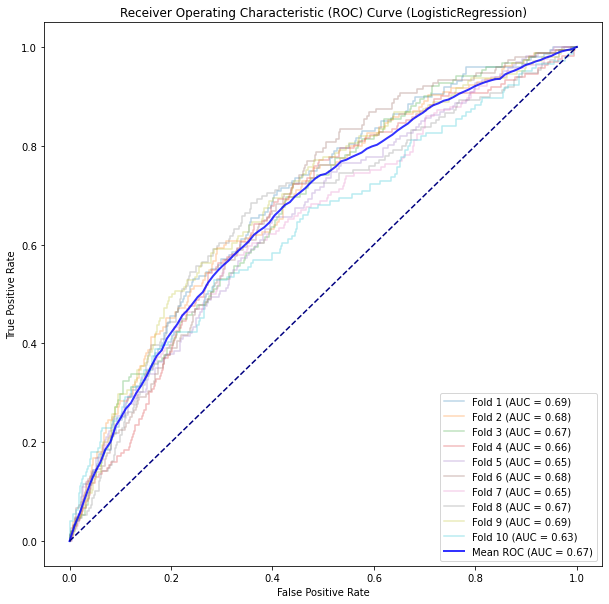

C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\nghhi\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver t

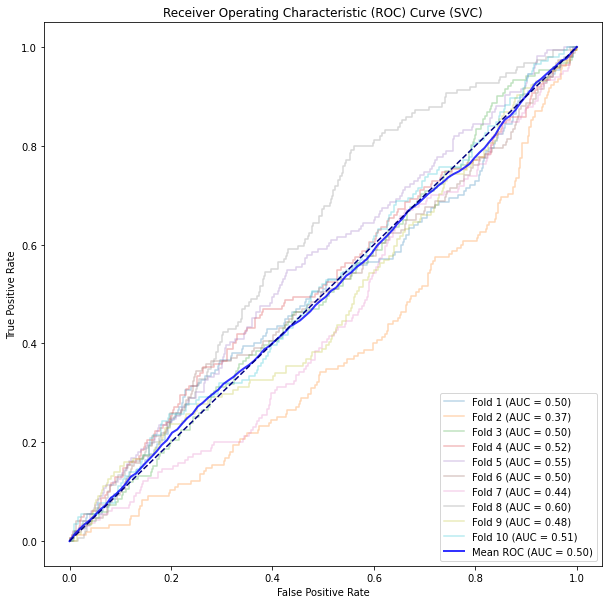

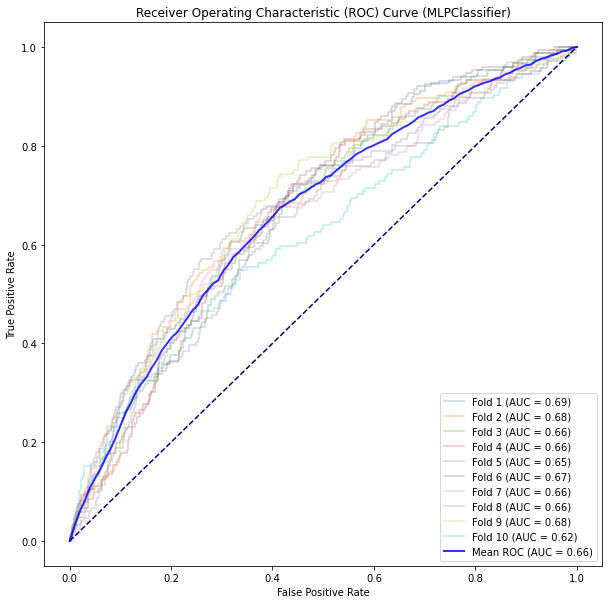

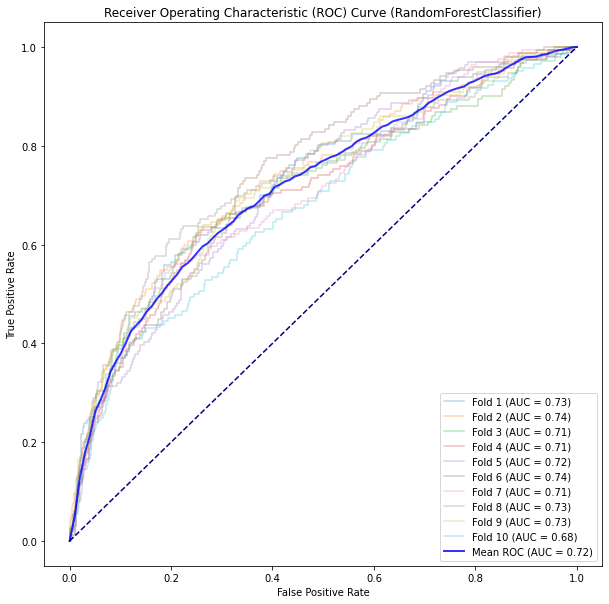

In [179]:
def KfoldPlot(X, y, clf, k, random_state=None):
    kf = KFold(n_splits=k, random_state=random_state, shuffle=True)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    plt.figure(figsize=(10, 10))
    for train_index, val_index in kf.split(X):
        X_train_cv, X_val_cv = X.iloc[train_index], X.iloc[val_index]  # Use .iloc for DataFrame indexing
        y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]  # Use .iloc for Series indexing
        clf.fit(X_train_cv, y_train_cv)
        y_prob = clf.predict_proba(X_val_cv)[:, 1]
        fpr, tpr, _ = roc_curve(y_val_cv, y_prob)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
        # Interpolate the TPRs at mean FPR points
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        
        # Plot each fold's ROC curve
        plt.plot(fpr, tpr, alpha=0.3, label=f'Fold {len(aucs)} (AUC = {roc_auc:.2f})')

    # Calculate the mean of the true positive rates
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)

    # Plot the mean ROC curve
    plt.plot(
        mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8
    )

    # Plot the random guess line
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve ({clf.__class__.__name__})')
    plt.legend(loc="lower right")
    plt.show()


KfoldPlot(X, y, clf_logistic, 10 ,random_state=42)
KfoldPlot(X, y, clf_svm, 10 ,random_state=42)
KfoldPlot(X, y, clf_ann, 10 ,random_state=42)
KfoldPlot(X, y, cls_forest, 10 ,random_state=42)



#### From the K-fold cross-validation, we observe that the Random Forest model remains the best among the four models. This is evidenced by its highest mean AUC of 0.72.
#### An mean AUC of 0.72 is not excellent (AUC > 0.9), but it indicates that the model has good distinguishing power and can effectively differentiate between classes(in our case, subscribed and not subscribed).

### Train and Validation Performance Gap

#### We assessed the performance gap between training and validation accuracy using K-Fold cross-validation. We chose K-Fold over a single train-test split for several reasons:
#### 1.More Reliable Estimates: K-Fold cross-validation divides the data into multiple folds, resulting in several different train-test splits. This approach provides more robust and reliable performance estimates by averaging results across multiple folds.

#### 2.Reduced Variance: By averaging performance metrics from different folds, K-Fold cross-validation minimizes the variance in performance estimates. This leads to a more stable measure of model performance compared to a single split.

#### 3.Better Overfitting and Underfitting Detection: Multiple folds enable us to evaluate the model on different subsets of data, helping to identify whether the model is overfitting or underfitting. Consistent performance across all folds suggests that the model generalizes well.

In [180]:
def compute_accuracy_gap(X, y, clf, k, random_state=None):
    kf = KFold(n_splits=k, shuffle=True, random_state=random_state)

    train_accuracies = []
    val_accuracies = []

    for train_index, val_index in kf.split(X):
        X_train_cv, X_val_cv = X.iloc[train_index], X.iloc[val_index]
        y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]

        # Clone the classifier to ensure a fresh model for each fold
        clf_clone = clone(clf)
        clf_clone.fit(X_train_cv, y_train_cv)

        # Calculate training accuracy
        train_accuracy = clf_clone.score(X_train_cv, y_train_cv)
        train_accuracies.append(train_accuracy)

        # Calculate validation accuracy
        val_accuracy = clf_clone.score(X_val_cv, y_val_cv)
        val_accuracies.append(val_accuracy)

    # Calculate mean and standard deviation for training and validation accuracies
    mean_train_accuracy = np.mean(train_accuracies)
    mean_val_accuracy = np.mean(val_accuracies)

    # Calculate the performance gap
    performance_gap = mean_train_accuracy - mean_val_accuracy

    # Round the values
    mean_train_accuracy_rounded = round(mean_train_accuracy, 3)
    mean_val_accuracy_rounded = round(mean_val_accuracy, 3)
    performance_gap_rounded = round(performance_gap, 3)

    print('Mean Training Accuracy =', mean_train_accuracy_rounded)
    print('Mean Validation Accuracy =', mean_val_accuracy_rounded)
    print('Performance Accuracy Gap (Training - Validation) =', performance_gap_rounded)

compute_accuracy_gap(X, y, cls_forest, k=10, random_state=42)

Mean Training Accuracy = 0.869
Mean Validation Accuracy = 0.822
Performance Accuracy Gap (Training - Validation) = 0.047


#### The gap between training and validation accuracy is small but not negligible, indicating some degree of overfitting.

#### Another method to assess overfitting is to compare the mean AUC scores between the training and validation datasets using K-Fold Cross-Validation.

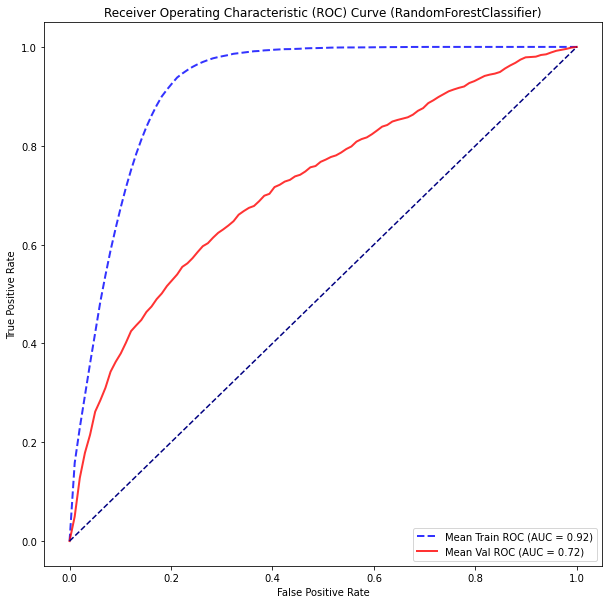

In [181]:
def KfoldPlot_gap(X, y, clf, k, random_state=None):
    kf = KFold(n_splits=k, random_state=random_state, shuffle=True)
    tprs_train = []
    aucs_train = []
    tprs_val = []
    aucs_val = []
    mean_fpr = np.linspace(0, 1, 100)

    for train_index, val_index in kf.split(X):
        X_train_cv, X_val_cv = X.iloc[train_index], X.iloc[val_index]
        y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]
        
        clf.fit(X_train_cv, y_train_cv)
        
        # Training set ROC curve and AUC
        y_train_prob = clf.predict_proba(X_train_cv)[:, 1]
        fpr_train, tpr_train, _train = roc_curve(y_train_cv, y_train_prob)
        roc_auc_train = auc(fpr_train, tpr_train)
        aucs_train.append(roc_auc_train)
        interp_tpr_train = np.interp(mean_fpr, fpr_train, tpr_train)
        interp_tpr_train[0] = 0.0
        tprs_train.append(interp_tpr_train)
        
        # Validation set ROC curve and AUC
        y_prob = clf.predict_proba(X_val_cv)[:, 1]
        fpr, tpr, _ = roc_curve(y_val_cv, y_prob)
        roc_auc = auc(fpr, tpr)
        aucs_val.append(roc_auc)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs_val.append(interp_tpr)

    # Calculate the mean of the true positive rates for training set
    mean_tpr_train = np.mean(tprs_train, axis=0)
    mean_tpr_train[-1] = 1.0
    mean_auc_train = auc(mean_fpr, mean_tpr_train)

    # Calculate the mean of the true positive rates for validation set
    mean_tpr_val = np.mean(tprs_val, axis=0)
    mean_tpr_val[-1] = 1.0
    mean_auc_val = auc(mean_fpr, mean_tpr_val)

    plt.figure(figsize=(10, 10))

    # Plot the mean ROC curve for training set
    plt.plot(
        mean_fpr, mean_tpr_train, color='b',
        label=r'Mean Train ROC (AUC = %0.2f)' % (mean_auc_train),
        lw=2, alpha=.8, linestyle='--'
    )
    
    # Plot the mean ROC curve for validation set
    plt.plot(
        mean_fpr, mean_tpr_val, color='r',
        label=r'Mean Val ROC (AUC = %0.2f)' % (mean_auc_val),
        lw=2, alpha=.8
    )

    # Plot the random guess line
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve ({clf.__class__.__name__})')
    plt.legend(loc="lower right")
    plt.show()

# Example call
KfoldPlot_gap(X, y, cls_forest, 10, random_state=42)

#### Graph Conclusion:
#### The gap between the two graphs indicates that the model is overfitted.

#### To address overfitting, we applied several model complexity reduction techniques:
#### Reduced max_depth from 15 to 10.
#### Increased min_samples_split and min_samples_leaf from 3 to 6.
#### Increased min_impurity_decrease from 0.0000001 to 0.0001.
#### Reduced max_features from 6 to 4.
#### Reduced max_leaf_nodes from 180 to 130.

In [182]:
GS.best_params_.update({'max_depth': 10 ,'min_samples_split' : 6, 'min_samples_leaf' : 6, "min_impurity_decrease": 0.0001
                       , 'max_features': 4, 'max_leaf_nodes': 130})
cls_forest = RandomForestClassifier(**GS.best_params_)
cls_forest.fit(X_train,y_train)



RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=4,
                       max_leaf_nodes=130, min_impurity_decrease=0.0001,
                       min_samples_leaf=6, min_samples_split=6,
                       n_estimators=300, random_state=42)

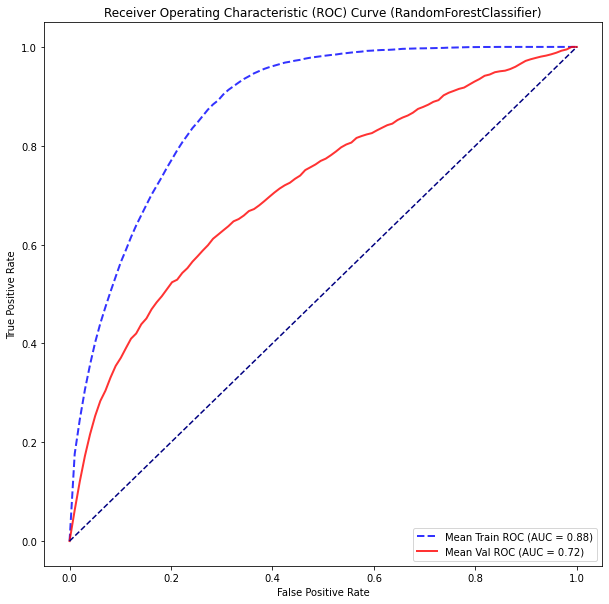

In [183]:
KfoldPlot_gap(X, y, cls_forest, 10, random_state=42)

#### Graph Conclusion:
#### We succeded to reduce the performance gap between the train and validation data (decreased the overfitting)  
#### and prevent negatively impacting on the generalization performance on the validation set.

In [184]:
compute_accuracy_gap(X, y, cls_forest, k=10, random_state=42)

Mean Training Accuracy = 0.834
Mean Validation Accuracy = 0.795
Performance Accuracy Gap (Training - Validation) = 0.039


#### The training accuracy decreased to 0.795, which is expected since reducing model complexity typically limits the model's ability to perfectly fit the training data.
#### The validation accuracy also decreased slightly to 0.834, but the gap between train and validation performance decreased slightly to 0.039.

#### We will check the confusion matrix results for the new, 
#### less complex model to evaluate its performance after the reduction in complexity.

[[ 253  396]
 [ 130 2566]]


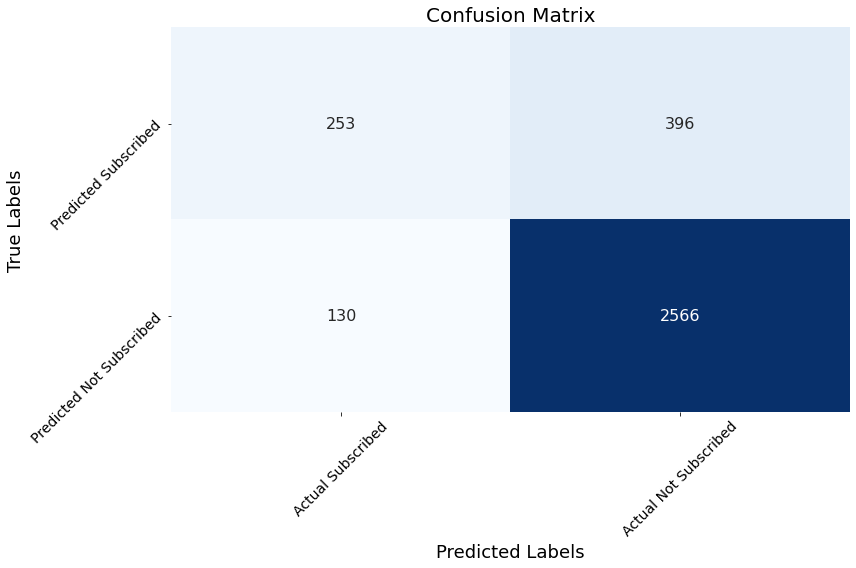

Accuracy: 0.84
Precision: 0.39
Sensitivity (Recall): 0.66
Specificity: 0.87
False Positive Rate (FPR): 0.13


In [185]:
y_pred = cls_forest.predict(X_val)
y_true = y_val
conf_matrix(y_pred, y_true)



#### The revised model demonstrates more balanced performance metrics compared to the previous version:
#### Accuracy:  remained at 84%. The accuracy did not change after reduction in model complexity. 
#### Precision: Improved from 34% to 39%. This suggests that the model's predictions of subscribed customers are more accurate, with fewer false positives.
#### Sensitivity (Recall): Significantly increased from 42% to 66%. This substantial improvement shows the model's enhanced ability to correctly identify subscribed customers.
#### Specificity: Decreased from 90% to 87%. This reduction indicates a slight increase in false positives among non-subscribed customers.
#### False Positive Rate (FPR): Increased from 10% to 13%. This rise reflects a higher proportion of non-subscribed customers being incorrectly classified as subscribed.
#### Final Conclusion
#### The updated model presents a trade-off: while there is a slight decrease in specificity and an increase in the false positive rate, indicating more non-subscribed customers are misclassified as subscribed, the model has made substantial gains in identifying subscribed customers, as evidenced by the significant increase in sensitivity.
#### Overall, the model’s improved sensitivity means it is now more effective at detecting subscribed customers. Consequently, the telecom company can use this model to focus resources on customers predicted to subscribe to new plans, rather than investing effort in those predicted not to subscribe.

## 5.Prediction

#### We will use the Random Forest model for predictions and train it on the entire training dataset. Since we have completed the evaluation stage, utilizing the full dataset will enhance the model's ability to make accurate predictions.
#### The prediction probabilities in the CSV document represent the model’s estimate of a customer’s likelihood to subscribe to the new plan: a probability close to 1 indicates a high likelihood of subscription, while a probability close to 0 indicates a low likelihood of subscription.

In [186]:
cls_forest.fit(X, y)
X_test = df_test
y_test_predict_proba = cls_forest.predict_proba(X_test)[:, 1]  # Probability of the subscribed_to_new_plan class

# Round the predicted probabilities to 4 decimal places
y_test_predict_proba = np.round(y_test_predict_proba, 4)

# customer_id column from X_test
customer_id = X_test_customer_id

# Create a new DataFrame with customer_id and the predicted values
submission_df = pd.DataFrame({
    'id': customer_id,
    'predict_prob': y_test_predict_proba
})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission_group_28.csv', index=False)

print("Submission file created successfully.")

Submission file created successfully.
